# Main Functions

In [2]:
# `numbat` kernel
library(Seurat)
library(tidyverse)
library(patchwork)
library(viridis)


outdir <- "/home/ubuntu/data/cxcr4-pdac/combine_samples"
objects <- list(
    "combined" = file.path(outdir, "combined.RDS"),
    "malig" = file.path(outdir, "malig.RDS"),
    "non_malig" = file.path(outdir, "non_malig.RDS"),
    "annotations" = file.path(outdir, "annotations.RDS")
)


# From Mori
PDAC_epi <- list(c(
    "AGR2", "CTSE", "GABRP", "SFN", "KLK10", "PSCA", "TSTD1", "PIGR",
    "LGALS4", "FERMT1", "RNF128", "ECT2", "CCL20", "SPTSSB", "VSIG2",
    "AQP3", "CDH3", "KRT7", "KRT16", "KRT15", "MUC1", "MUC5AC", "EPCAM",
    "CEACAM1", "ITGB4", "ITGA2", "TSPAN1", "TSPAN8"
))

# Citations:
# Biermann J, Melms JC, Amin AD, Wang Y, Caprio LA, Karz A, Tagore S, Barrera I, Ibarra-Arellano MA, Andreatta M, Fullerton BT, Gretarsson KH, Sahu V, Mangipudy VS, Nguyen TTT, Nair A, Rogava M, Ho P, Koch PD, Banu M, Humala N, Mahajan A, Walsh ZH, Shah SB, Vaccaro DH, Caldwell B, Mu M, Wünnemann F, Chazotte M, Berhe S, Luoma AM, Driver J, Ingham M, Khan SA, Rapisuwon S, Slingluff CL Jr, Eigentler T, Röcken M, Carvajal R, Atkins MB, Davies MA, Agustinus A, Bakhoum SF, Azizi E, Siegelin M, Lu C, Carmona SJ, Hibshoosh H, Ribas A, Canoll P, Bruce JN, Bi WL, Agrawal P, Schapiro D, Hernando E, Macosko EZ, Chen F, Schwartz GK, Izar B. Dissecting the treatment-naive ecosystem of human melanoma brain metastasis. Cell. 2022 Jul 7;185(14):2591-2608.e30. doi: 10.1016/j.cell.2022.06.007. PMID: 35803246; PMCID: PMC9677434.
# Melms JC, Biermann J, Huang H, Wang Y, Nair A, Tagore S, Katsyv I, Rendeiro AF, Amin AD, Schapiro D, Frangieh CJ, Luoma AM, Filliol A, Fang Y, Ravichandran H, Clausi MG, Alba GA, Rogava M, Chen SW, Ho P, Montoro DT, Kornberg AE, Han AS, Bakhoum MF, Anandasabapathy N, Suárez-Fariñas M, Bakhoum SF, Bram Y, Borczuk A, Guo XV, Lefkowitch JH, Marboe C, Lagana SM, Del Portillo A, Tsai EJ, Zorn E, Markowitz GS, Schwabe RF, Schwartz RE, Elemento O, Saqi A, Hibshoosh H, Que J, Izar B. A molecular single-cell lung atlas of lethal COVID-19. Nature. 2021 Jul;595(7865):114-119. doi: 10.1038/s41586-021-03569-1. Epub 2021 Apr 29. Erratum in: Nature. 2021 Oct;598(7882):E2. PMID: 33915568; PMCID: PMC8814825.
# Chuan Xu, Martin Prete, Simone Webb, Laura Jardine, Benjamin Stewart, Regina Hoo, Peng He, Sarah A. Teichmann. Automatic cell type harmonization and integration across Human Cell Atlas datasets. bioRxiv 2023.05.01.538994 (2023).
# Franzén O, Gan LM, Björkegren JLM. PanglaoDB: a web server for exploration of mouse and human single-cell RNA sequencing data. Database (Oxford). 2019 Jan 1;2019:baz046. doi: 10.1093/database/baz046. PMID: 30951143; PMCID: PMC6450036.
genes_t_cells <- c("BCL11B", "FYN", "IKZF1", "CCL5", "LYST", "CD247", "CBLB", "IQGAP2", "ETS1", "SKAP1", "ELMO1", "ITGA4", "DTDH1", "AOAH", "PTPRC", "CD44", "PYHIN1", "CD8A", "CD96", "IFI6", "NFAT5", "THEMIS", "PRKCH", "ITK", "PDE3B", "BACH2", "NCK2", "CELF2", "ITGA1", "RBPJ", "TNIK", "LEF1", "RIPOR2", "AKT3", "RORA", "FOXP1", "NCAM1", "KLRC1", "KLRC2", "KLRD1", "LYN", "NCR1", "KLRK1", "RPLP1", "RPL41", "RPL13", "ACTB", "B2M", "STAT4", "RUNX2", "ITGA4", "ITGA1", "CD69", "ITGAE", "CD44", "CD58", "IL2RA", "TBC1D4", "CTLA4", "ICOS", "CD4")
genes_myeloid <- c("CLEC9A", "XCR1", "CLNK", "SLC38A1", "RTN1", "SIRPA", "IDO1", "LAMP3", "CD200", "MS4A2", "KIT", "MRC1", "MERTK", "FCGR1A", "CD38", "CD163L1", "SELENOP", "F13A1", "DAB2", "SIGLEC1", "FTL", "FTH1", "NAV3", "C3", "P2RY12", "VCAN", "FCN1", "LYZ")
genes_endothelial <- c("VEGFC", "DLL4", "EFNB2", "RGCC", "KIAA1217", "ARHGAP18", "MMRN1", "FLT4", "SEMA3D", "RELN", "IL1R1", "NR2F2", "CDH11", "MKI67")
genes_fibroblasts <- c("RGS5", "CSPG4", "ABCC9", "PDGFRA", "LUM", "DCN", "CTHRC1", "COL1A1", "COL3A1", "COL6A1", "LAMA2")
genes_bcells <- c("BANK1", "BLK", "MKI67", "TOP2A", "SDC1", "CD38", "PRDM1", "CD19", "CD20") # Added CD19 and CD20
genes_neuronal <- c("GFAP", "AQP4", "SLC1A2", "GJA1", "RELN", "NRGN", "STX1A", "NEFH", "SYP", "SNRPN", "SATB2", "SLC17A7", "GAD1", "GAD2", "SLC32A1", "SLC6A1", "MAG", "MOG", "MBP", "MOBP", "VCAN", "CSPG4", "SOX10", "OLIG1")


# Exhaustive subtype markers from Dr Tagore's spreadsheets
get_exhaustive_markers <- function(celltype) {
    sig_dir <- "/home/ubuntu/data/cxcr4-pdac/signatures"
    markerfile <- file.path(sig_dir, paste0(celltype, ".csv"))
    data <- read.csv(markerfile)

    out <- list()
    for (col in colnames(data)) {
        genes <- data[[col]]
        genes <- genes[genes != ""]
        out[[col]] <- list(genes)
    }
    return(out)
}


message_ <- function(...) {
    message(paste0(Sys.time(), ": ", paste(...)))
}

reprocess_subset <- function(subset, name, assay = "RNA", verbose = FALSE) {
    outfile <- file.path(outdir, paste0(name, "_", assay, ".RDS"))

    if (file.exists(outfile)) {
        message_("Reading from ", outfile)
        out <- readRDS(outfile)
    } else {
        if (assay == "RNA") {
            DefaultAssay(subset) <- "RNA"
            message_("Normalizing")
            subset <- NormalizeData(subset,
                normalization.method = "LogNormalize",
                scale.factor = 10000,
                verbose = verbose
            )
            message("Finding var features")
            subset <- FindVariableFeatures(subset,
                selection.method = "vst",
                nfeatures = 2000,
                verbose = verbose
            )

            all.genes <- rownames(subset)
            message_("Scaling data")
            subset <- ScaleData(subset, features = all.genes, verbose = verbose)

            message_("Running PCA")
            subset <- RunPCA(subset,
                npcs = 150,
                features = VariableFeatures(object = subset),
                verbose = verbose
            )

            message_("Running UMAP")
            subset <- RunUMAP(subset, reduction = "pca", dims = 1:30, verbose = verbose)

            message_("Clustering")
            subset <- FindNeighbors(subset, reduction = "pca", dims = 1:30, verbose = verbose)
            subset <- FindClusters(subset, resolution = 0.5, verbose = verbose)
            out <- subset
        } else if (assay == "integrated") {
            sample.list <- SplitObject(subset, split.by = "orig.ident")

            # SUBSET OUT THE SAMPLES WITH < 75 CELLS
            # Will cause FindIntegrationAnchors to break bc it needs 30 dims
            valid_samples <- lapply(sample.list, function(x) nrow(x@meta.data) > 100)
            sample.list <- sample.list[valid_samples == TRUE]

            message_("Normalizing and finding var features")
            sample.list <- lapply(X = sample.list, FUN = function(x) {
                DefaultAssay(x) <- "RNA"
                x <- NormalizeData(x, verbose = verbose)
                x <- FindVariableFeatures(x, selection.method = "vst", nfeatures = 2000, verbose = verbose)
            })



            message_("Selecting integration features")
            features <- SelectIntegrationFeatures(object.list = sample.list, verbose = verbose)
            message_("Finding anchors")
            anchors <- FindIntegrationAnchors(object.list = sample.list, anchor.features = features, verbose = verbose)
            message_("Integrating")
            combined <- IntegrateData(anchorset = anchors, verbose = verbose)


            DefaultAssay(combined) <- "integrated"

            # Run the standard workflow for visualization and clustering
            message_("Scaling")
            combined <- ScaleData(combined, verbose = verbose)
            message_("PCA/UMAP")
            combined <- RunPCA(combined, npcs = 150, verbose = verbose)
            combined <- RunUMAP(combined, reduction = "pca", dims = 1:30, verbose = verbose)
            message_("Clustering")
            combined <- FindNeighbors(combined, reduction = "pca", dims = 1:30, verbose = verbose)
            combined <- FindClusters(combined, resolution = 0.5, verbose = verbose)
            message_("Done")

            out <- combined
        }

        message_("Saving to ", outfile)
        saveRDS(out, outfile)
    }
    return(out)
}

titrate_UMAP <- function(subset, subset_name, assay = "RNA", group.by = "seurat_clusters", final_params = NULL, verbose = F) {
    # Input: A subset post-integration clustering. Clusters are not re-computed
    # but are kept the same as the integration assay clusters for ease of
    # comparison. Here, we titrate different values for dims, epochs, n.neighbors
    # and then select the UMAP params that lead to best separation.
    # Finally, once a good set of conditions is picked, we pass the final
    # conditions and perform clustering.

    message_("Starting scaling, FindVariableFeatures, and RunPCA")
    DefaultAssay(subset) <- assay

    subset <- ScaleData(subset, features = rownames(subset), verbose = verbose)
    subset <- FindVariableFeatures(subset)
    subset <- RunPCA(subset, verbose = verbose, npcs = 150)

    n_cells <- dim(subset[[assay]]@counts)[2]

    if (is.null(final_params)) {
        message_("Titrating")
        dim_options <- c(20, 50, 100, 150)
        epoch_options <- c(200, 500)
        n_neighbor_options <- c(30, 50)

        ct <- 1
        list_of_plots <- list()
        for (cur_dim in dim_options) {
            for (cur_epoch in epoch_options) {
                for (cur_neighbors in n_neighbor_options) {
                    # Yes it's heavily nested, who's gonna stop me? >:)
                    title <- paste0(
                        subset_name, " (n=", n_cells, "; ", assay, ")\n",
                        "dims 1:", cur_dim,
                        "; epochs:", cur_epoch,
                        "; neighbors:", cur_neighbors
                    )
                    message_("Starting", title)
                    subset <- RunUMAP(subset,
                        reduction = "pca",
                        dims = 1:cur_dim,
                        n.epochs = cur_epoch,
                        n.neighbors = cur_neighbors,
                        verbose = verbose
                    )
                    list_of_plots[[ct]] <- DimPlot(subset, group.by = group.by, label = T) +
                        ggtitle(title) + NoLegend()
                    ct <- ct + 1
                    message_("Finished")
                }
            }
        }
        out <- patchwork::wrap_plots(list_of_plots, nrow = 4, ncol = 4)

        out_dir <- file.path(outdir, "titrate_umap")
        if (!dir.exists(out_dir)) dir.create(out_dir)
        outpath <- file.path(out_dir, paste0(subset_name, ".png"))

        message_("Saving image at ", outpath)
        ggsave(outpath, out, width = 20, height = 20, units = "in")
        print(out)
        return(out)
    } else {
        stopifnot(all(c("dims", "epochs", "neighbors", "resolution")
        %in% names(final_params)))

        message_("Running UMAP and clustering with provided parameters")

        subset <- RunUMAP(subset,
            reduction = "pca",
            dims = 1:final_params[["dims"]],
            n.epochs = final_params[["epochs"]],
            n.neighbors = final_params[["neighbors"]],
            verbose = verbose
        )

        subset <- FindNeighbors(subset,
            reduction = "pca",
            dims = 1:final_params[["dims"]],
            verbose = verbose
        )
        subset <- FindClusters(subset, resolution = final_params[["resolution"]])

        print(DimPlot(subset, label = T, group.by = group.by) +
            ggtitle(paste0(subset_name, " (n=", n_cells, ")\n")) +
            NoLegend())
        return(subset)
    }
}

plot_subset <- function(subset, title, group = "seurat_clusters",
                        cells.highlight = NA, w = 10, h = 4, r = TRUE, l = TRUE) {
    if (is.list(cells.highlight)) {
        grp <- names(cells.highlight)[1]
        cells <- cells.highlight[[grp]]
        subset@meta.data[cells, grp] <- TRUE
        subset@meta.data[is.na(subset@meta.data[, grp]), grp] <- FALSE

        cols <- c("TRUE" = "red", "FALSE" = "grey")
        p1 <- DimPlot(subset,
            reduction = "pca",
            group.by = grp, raster = r, label = l
        ) +
            scale_color_manual(values = cols) +
            guides(color = guide_legend(ncol = 1))
        p2 <- DimPlot(subset,
            reduction = "umap",
            group.by = grp, raster = r, label = l
        ) +
            scale_color_manual(values = cols) +
            NoLegend()
        p3 <- (subset@meta.data %>% rownames_to_column("tmp_barcode") %>%
            mutate(is_selected = tmp_barcode %in% cells) %>%
            group_by(!!sym(group)) %>%
            summarize(Percent = sum(is_selected) / n()) %>%
            ggplot(aes(!!sym(group), Percent, fill = !!sym(group))) +
            geom_bar(stat = "identity") +
            NoLegend() +
            theme_classic() +
            ylim(0, 1))

        samplesize <- paste0(
            "\n(", DefaultAssay(subset), "; n=", length(cells),
            "/", nrow(subset@meta.data), ")"
        )
        out <- ((p1 | p2) / p3) + plot_annotation(title = paste0(title, samplesize))
    } else {
        p1 <- DimPlot(subset,
            reduction = "pca",
            group.by = group, label = l, raster = r
        ) +
            guides(color = guide_legend(ncol = 1))
        p2 <- DimPlot(subset,
            reduction = "umap",
            group.by = group, label = l, raster = r
        ) + NoLegend()

        samplesize <- paste0(
            "\n(", DefaultAssay(subset), "; n=",
            nrow(subset@meta.data), ")"
        )
        out <- (p1 | p2) + plot_annotation(title = paste0(title, samplesize))
    }

    options(repr.plot.width = w, repr.plot.height = h)
    print(out)
}

assay_subset <- function(subset, genes, name, mode,
                         cells.highlight = NA,
                         group = "seurat_clusters", w = 10, h = 4, r = TRUE) {
    if (mode == "module") {
        DefaultAssay(subset) <- "RNA"
        subset <- AddModuleScore(subset, genes, name = name, assay = "RNA")

        if (is.list(cells.highlight)) {
            group <- names(cells.highlight)[1]
            subset@meta.data[cells.highlight[[group]], group] <- TRUE
            subset@meta.data[is.na(subset@meta.data[, group]), group] <- FALSE
        }

        p1 <- FeaturePlot(subset,
            features = paste0(name, "1"),
            reduction = "umap", raster = r
        ) + scale_color_viridis()
        p2 <- VlnPlot(subset,
            features = paste0(name, "1"),
            sort = TRUE, group.by = group
        ) + xlab(group) + NoLegend()

        options(repr.plot.width = w, repr.plot.height = h)
        print(p1 | p2)
    } else {
        DefaultAssay(subset) <- "RNA"
        for (gene in genes) {
            p1 <- FeaturePlot(subset, features = gene, reduction = "umap", raster = r) & scale_color_viridis()
            p2 <- VlnPlot(subset, features = gene, sort = TRUE, group.by = group) + xlab(group) + NoLegend()

            options(repr.plot.width = w, repr.plot.height = h)
            print(p1 | p2)
        }
    }
}

################################################################################

# The following are for manually copy-pasting marker gene names

# Panglao has a character limit. I know, annoying. Use Enrichr instead.
collapse_names <- function(genes, max_length = 95) { 
    result_list <- list()
    current_string <- ""

    # genes <- genes[!grepl('[\\.]|[-]', genes)]  # Remove genes with a period or dash

    for (name in genes) {
        if (nchar(current_string) + nchar(name) + 1 <= max_length) {
            if (current_string != "") {
                current_string <- paste0(current_string, ",", name)
            } else {
                current_string <- name
            }
        } else {
            result_list <- append(result_list, list(current_string))
            current_string <- name
        }
    }

    if (current_string != "") {
        result_list <- append(result_list, list(current_string))
    }

    return(result_list)
}

# Use for enrichr
print_marker_list <- function(marker_df, only_pos = T) {
    QUERIES <- list()
    for (cluster in unique(marker_df$cluster)) {
        pos <- marker_df[marker_df$cluster == cluster, ] %>%
            filter(p_val_adj < 0.05) %>%
            filter(avg_log2FC > 0) %>%
            arrange(-avg_log2FC)
        # message(paste('Cluster', cluster, ': ngenes=', length(pos$gene)))

        neg <- marker_df[marker_df$cluster == cluster, ] %>%
            filter(cluster == cluster) %>%
            filter(p_val_adj < 0.05) %>%
            filter(avg_log2FC < 0) %>%
            arrange(avg_log2FC)

        if (only_pos) {
            QUERIES[[cluster]] <- paste(pos$gene, collapse = "\n")
        } else {
            positive <- toString(pos$gene)
            negative <- toString(neg$gene)
            QUERIES[[cluster]] <- paste0(positive, ",,,", negative)
        }
    }
    return(QUERIES)
}


################################################################################

combined <- readRDS(objects[["combined"]]) # From the previous notebook

source("./helpers/add_metadata.R")
source("./helpers/color.R")


Warning message:
“package ‘circlize’ was built under R version 4.3.3”
circlize version 0.4.16
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enhances circular visualization
  in R. Bioinformatics 2014.

This message can be suppressed by:
  suppressPackageStartupMessages(library(circlize))




In [3]:
annotations <- make_granular_labels()
combined <- combined %>% add_metadata()
# combined@meta.data
# saveRDS(combined, '/home/ubuntu/tmp/cxcr4_integrated_with_metadata.RDS')

In [16]:
all_cols <- combined@meta.data %>% colnames()
good_cols <- all_cols[!grepl('loss|dupli|proportion|p_|cnv|selected_snn|opt|selected|malignant', all_cols)]

# Writing the combined object as one large counts matrix and one large metadata file, since the govt shutdown prevents us from uploading to GEO

write.csv(combined@assays$RNA@counts, '/home/ubuntu/data/cxcr4-pdac/combine_samples/cxcr4_all_samples_counts.csv')
write.csv(combined@meta.data[, good_cols], '/home/ubuntu/data/cxcr4-pdac/combine_samples/cxcr4_all_samples_metadata.csv')

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 23.8 GiB”


# Integrated object

In [ ]:
# Naive malignant predictions, pre cleaning

combined@meta.data$selected_filtered_numbat[is.na(combined@meta.data$selected_filtered_numbat)] <- FALSE
combined@meta.data$selected_filtered_infercnv[is.na(combined@meta.data$selected_filtered_infercnv)] <- FALSE

malig_tmp <- subset(combined, selected_filtered_numbat==TRUE | selected_filtered_infercnv==TRUE)

In [ ]:
plot_subset(combined, 'Integration by sample', group='orig.ident') 
plot_subset(combined, 'Integration by Seurat cluster', group='seurat_clusters')
assay_subset(combined, genes=list(PDAC_epi), name='PDAC_epi', mode='module', group='seurat_clusters', w=10, h=4, r=F)
plot_subset(combined, 'Malignant cells in integration', 
            cells.highlight=list('Malig'=colnames(malig_tmp)), h=6) 
plot_subset(combined, '"Malig" (epithelial) cells from noisy samples', 
            cells.highlight=list('Malig_from_noisy_sample'=
                                 rownames(combined@meta.data[combined$selected_filtered_infercnv,])),
            h=6) 

# Now let's clean up the malignant cells based on clusters we see:
cleaned_malig_cells <- combined@meta.data[colnames(malig_tmp),] %>% 
                        filter(seurat_clusters %in% c(1, 3, 4, 8, 9, 10, 11)) %>%
                        rownames()
plot_subset(combined, 'Malignant cells in integration, cleaned', 
            cells.highlight=list('malignant_curated'=cleaned_malig_cells),
            h=6) 

assay_subset(combined, genes=list(PDAC_epi), name='PDAC_epi', 
            mode='module', cells.highlight=list('malignant_curated'=cleaned_malig_cells), 
            w=10, h=4)

In [ ]:
annotations <- data.frame(barcodes=colnames(combined)) %>%
    column_to_rownames('barcodes')

# Write top level annotations
annotations[cleaned_malig_cells, 'is_malig'] <- TRUE
annotations$is_malig[is.na(annotations$is_malig)] <- FALSE

if (!file.exists(objects[['annotations']])) {  # Don't want to overwrite
    saveRDS(annotations, objects[['annotations']])
}


# Malignant compartment

In [ ]:
annotations <- make_granular_labels()
malig <- subset(combined, 
                cells=annotations %>% 
                filter(is_malig==TRUE) %>%
                rownames(.)) %>%
         reprocess_subset('malig', assay='RNA')  
# The first time you run this block, it'll take a while. After, reprocess_subset()
# will lazy evaluate and just read from the RDS file so it's quick.

In [ ]:
plot_subset(malig, 'Malignant compartment by Seurat cluster', group='seurat_clusters')
plot_subset(malig, 'Malignant compartment by sample', group='orig.ident')
assay_subset(malig, genes=list(PDAC_epi), name='PDAC_epi', mode='module', group='orig.ident', w=10, h=4, r=F)


# Nonmalignant compartment

## Nonmalig annotation

In [4]:
annotations <- make_granular_labels()
non_malig <- subset(combined, 
                cells=annotations %>% 
                filter(is_malig==FALSE) %>%
                rownames(.)) %>%
         reprocess_subset('non_malig', assay='RNA')

2025-12-04 21:08:06.708617: Reading from  /home/ubuntu/data/cxcr4-pdac/combine_samples/non_malig_RNA.RDS



In [ ]:
options(repr.plot.width=10, repr.plot.height=10)
non_malig_titration <- titrate_UMAP(non_malig, 'non_malig_rna', assay='RNA')

In [ ]:
options(repr.plot.width=7, repr.plot.height=7)
non_malig <- titrate_UMAP(non_malig, 'non_malig_rna', assay='RNA',
                    final_params=list('dims'=100,'epochs'=200, 'neighbors'=50, 'resolution'=0.3))
# saveRDS(non_malig, '/home/ubuntu/data/cxcr4-pdac/combine_samples/non_malig_RNA.RDS')

### Major clusters and experiment mixture

In [ ]:
# non_malig <- FindClusters(non_malig, resolution=0.3)
plot_subset(non_malig, 'Nonmalignant compartment by Seurat cluster', group='seurat_clusters')
plot_subset(non_malig, 'Nonmalignant compartment by sample', group='orig.ident')

### ModuleScore assays

In [ ]:
assay_subset(non_malig, genes=list(PDAC_epi), name='PDAC_epi', mode='module', group='seurat_clusters', w=10, h=4)
assay_subset(non_malig, genes=list(genes_t_cells), name='T_cell', mode='module', group='seurat_clusters', w=10, h=4)
assay_subset(non_malig, genes=list(genes_bcells), name='B_cell', mode='module', group='seurat_clusters', w=10, h=4)
assay_subset(non_malig, genes=list(genes_myeloid), name='Myeloid', mode='module', group='seurat_clusters', w=10, h=4)
assay_subset(non_malig, genes=list(genes_endothelial), name='Endothelial', mode='module', group='seurat_clusters', w=10, h=4)
assay_subset(non_malig, genes=list(genes_fibroblasts), name='Fibroblast', mode='module', group='seurat_clusters', w=10, h=4)
assay_subset(non_malig, genes=list(genes_neuronal), name='Neuronal', mode='module', group='seurat_clusters', w=10, h=4)


In [ ]:
# From PanglaoDB marker lists

epithelial_genes <- c('KRT14', 'EPCAM', 'MUC1', 'ANPEP', 'CD24', 'CEACAM1', 'IL1R1', 'KRT3', 'SCGB1A1', 'TP63')
basal_genes <- c('KRT5', 'KRT14', 'ITGA3', 'KRT15', 'LAMB3', 'RAB38', 'SLC16A3', 'PLAU', 'MT1X', 'S100A14')
cholangio_genes <- c('KRT19', 'MMP7', 'SSTR2', 'KRT7', 'SOX9', 'HNF1B', 'CFTR', 'AQP1', 'CXCL1', 'TFF1')
panc_acinar_genes <- c('PRSS1', 'KLK1', 'PNLIP', 'CTRC', 'AKR1C3', 'DUOXA2', 'ALDOB', 'REG3A', 'SERPINA3', 'PRSS3')
panc_a_genes <- c('GCG', 'TTR', 'PCSK2', 'FXYD5', 'LDB2', 'MAFB', 'CHGA', 'SCGB2A1', 'GLS', 'FAP', 'DPP4')
panc_b_genes <- c('INS', 'IAPP', 'INS2', 'NKX6-1', 'GJD2', 'NKX2-2', 'MAFA', 'INS1', 'SLC2A2', 'PDX1')
panc_d_genes <- c('SST', 'GABRB3', 'FRZB', 'MS4A8', 'BAIAP3', 'CASR', 'BCHE', 'UNC5B', 'EDN3', 'PRG4')
panc_duct_genes <- c('CFTR', 'TFF1', 'KRT19', 'S100A10', 'LGALS4', 'PERP', 'PDLIM3', 'WFDC2', 'SLC3A1', 'AQP1')
panc_e_genes <- c('GHRL', 'TM4SF5', 'NKX2-2', 'HRH2', 'CALCR', 'SLC6A16', 'PCSK6', 'ADAMTS6', 'COL22A1', 'FAM124A')
panc_y_genes <- c('PPY', 'ABCC9', 'FGB', 'ZNF503', 'MEIS1', 'LMO3', 'EGR3', 'CHN2', 'PTGFR', 'ENTPD2', 'AQP2')
panc_progenitor_genes <- c('ONECUT1', 'PDX1', 'PTF1A', 'CXCR4', 'ISL1', 'NKX2-2', 'EPAS1', 'ARX', 'NEUROG3', 'SOX9')

# assay_subset(non_malig, genes=list(epithelial_genes), name='Epithelial', mode='module', group='seurat_clusters', w=10, h=4)
# assay_subset(non_malig, genes=list(basal_genes), name='Basal Cells', mode='module', group='seurat_clusters', w=10, h=4)
# assay_subset(non_malig, genes=list(cholangio_genes), name='Cholangio', mode='module', group='seurat_clusters', w=10, h=4)
# assay_subset(non_malig, genes=list(panc_acinar_genes), name='Panc Acinar', mode='module', group='seurat_clusters', w=10, h=4)
# assay_subset(non_malig, genes=list(panc_a_genes), name='PancA', mode='module', group='seurat_clusters', w=10, h=4)
# assay_subset(non_malig, genes=list(panc_b_genes), name='PancB', mode='module', group='seurat_clusters', w=10, h=4)
# assay_subset(non_malig, genes=list(panc_d_genes), name='PancD', mode='module', group='seurat_clusters', w=10, h=4)
# assay_subset(non_malig, genes=list(panc_e_genes), name='PancE', mode='module', group='seurat_clusters', w=10, h=4)
# assay_subset(non_malig, genes=list(panc_y_genes), name='PancY', mode='module', group='seurat_clusters', w=10, h=4)
# assay_subset(non_malig, genes=list(panc_duct_genes), name='Panc Ductal', mode='module', group='seurat_clusters', w=10, h=4)
# assay_subset(non_malig, genes=list(panc_progenitor_genes), name='Panc Progenitor', mode='module', group='seurat_clusters', w=10, h=4)

### Finding nonmalignant cluster markers

In [ ]:
options(future.globals.maxSize= 10000*1024^2) # 10,000Mb limit

Idents(non_malig) <- 'seurat_clusters'
nonmalig_markers <- FindAllMarkers(non_malig, verbose=FALSE)

In [ ]:
saveRDS(nonmalig_markers, file.path(outdir, 'nonmalig_markers.RDS'))

### Interpretation with EnrichR

Copy positive markers as query; copy positive + negative markers as background. Navigate to "Cell type" tab and figure out a consensus from the various databases it annotates

In [ ]:
non_malig_markers <- readRDS(file.path(outdir, 'nonmalig_markers.RDS'))
non_malig_markers %>% write.table(file.path(outdir, 'nonmalignant_compartment_markers.tsv'), sep='\t')

In [ ]:
cat(print_marker_list(non_malig_markers)$`24`)  # I ran this for multiple clusters then pasted into Enrichr to get a consensus


### Interpretation with CellTypist

Using right now for the clusters that failed to get a clear label with Panglao/EnrichR

In [ ]:
redo_clusters <- c(10, 17, 18, 20, 21, 22, 24)  # And also redo all of GM36

In [ ]:
DefaultAssay(non_malig) <- 'RNA'

# Redo all the hepatocyte clusters so we can see celltype breakdown within each

celltypist_dir <- '/home/ubuntu/data/cxcr4-pdac/CellTypist/input'
if (!dir.exists(celltypist_dir)) dir.create(celltypist_dir, recursive=T)
for (i in redo_clusters) {
    
    outfile <- file.path(celltypist_dir, paste0('non_malig_cluster_', i, '.csv'))

    if (!file.exists(outfile)) {     
        message_('Started', i)   
        subset <- subset(non_malig, subset = seurat_clusters == i)
        write.table(as.matrix(GetAssayData(object = subset, slot = "counts")), 
                    outfile, 
                    sep = ',', row.names = T, col.names = T, quote = F)
        message_('Finished', i, ':', nrow(subset@meta.data), 'cells')
    }
    
}

# Do GM36 separately
outfile <- file.path(celltypist_dir, paste0('non_malig_cluster_', 'GM36', '.csv'))
if (!file.exists(outfile)) {     
    message_('Started GM36')   
    subset <- subset(non_malig, subset = orig.ident=='GM36')
    write.table(as.matrix(GetAssayData(object = subset, slot = "counts")), 
                outfile, 
                sep = ',', row.names = T, col.names = T, quote = F)
    message_('Finished', 'GM36', ':', nrow(subset@meta.data), 'cells')
}



# Now analyze in CellTypist

In [ ]:
combine_celltypist_annots <- function(cluster) {
    celltypist_preds <- lapply(
        paste0('/home/ubuntu/data/cxcr4-pdac/CellTypist/output/nonmalig_cluster_', 
        cluster, '/', 
        c('hep', 'imm', 'panc_islet', 'fetal_panc', 'skin', 'hlca', 
          'fetal_lung', 'airway_sc', 'airway_sn'),
        '/predicted_labels.csv'),
        function(path) {
            ref_type <- strsplit(path, '/')[[1]][10]
            if (file.exists(path)) {    
                df <- read.csv(path) %>% 
                        select(X, majority_voting)
                colnames(df) <- c('X', ref_type)
                return(df)    
            } else {
                return(NULL)
            }  
        }
    ) 
    
    celltypist_preds <- celltypist_preds[!sapply(celltypist_preds,is.null)] %>% 
        purrr::reduce(left_join, by = 'X') 

    if (is.character(cluster)) {
        subset <- non_malig@meta.data %>% filter(orig.ident == cluster)
    } else {
        subset <- non_malig@meta.data %>% filter(seurat_clusters == cluster)
    }

    out <- subset %>%
        select(seurat_clusters, celltype_bped_fine, celltype_hpca_fine) %>%
        rownames_to_column('X') %>%
        left_join(celltypist_preds, by='X') %>%
        column_to_rownames('X')
    return(out)
}

# Use this function along with the marker lists 
# to get a good annotation
combine_celltypist_annots('GM36') %>% 
    head(50)

In [ ]:
# Vestige from when we used CellTypist to do barcode-level annotations
# for certain noisy clusters


# nm <- non_malig@meta.data[, !names(non_malig@meta.data) %in% c('Celltype_Main', 'CellTypist')] %>%
#     rownames_to_column('TEMP_BARCODES') %>%
#     merge(prelim_consensus, by.x='seurat_clusters', by.y='nonmalig_cluster', how='left') %>%
#     column_to_rownames('TEMP_BARCODES')
# labels <- nm[,c('Celltype_Main', 'CellTypist')]

# AddCelltypistLabels <- function(labels, dir_list) {
#     ct.dir <- '/home/ubuntu/data/cxcr4-pdac/CellTypist'

#     annots <- list()
#     ct <- 1
#     for (d in dir_list) {
#         pred <- read.csv(file.path(ct.dir, d, 'predicted_labels.csv'))
#         annots[[ct]] <- pred
#         ct <- ct + 1
#     }
#     annots <- bind_rows(annots) %>%
#         mutate(Celltype_Main = case_when(
#                     majority_voting == 'B cells' ~ 'B cell',
#                     majority_voting == 'Cholangiocytes' ~ 'Cholangiocyte',
#                     majority_voting == 'Endothelial cells' ~ 'Endothelial',
#                     majority_voting == 'Fibroblasts' ~ 'Fibroblast',
#                     majority_voting == 'Hepatocytes' ~ 'Hepatocyte',
#                     majority_voting == 'Macrophages' ~ 'Myeloid',
#                     majority_voting == 'Mono+mono derived cells' ~ 'Myeloid',
#                     majority_voting == 'Neutrophils' ~ 'Myeloid',
#                     majority_voting == 'Plasma cells' ~ 'B cell',
#                     majority_voting == 'Resident NK' ~ 'T cell',
#                     majority_voting == 'T cells' ~ 'T cell',
#                     majority_voting == 'pDCs' ~ 'Myeloid',
#                     majority_voting == 'cDC2s' ~ 'Myeloid',
#                     TRUE ~ majority_voting  # Default: Keep existing label
#                     )
#                 ) %>%
#         column_to_rownames('X')
    
#     celltypist_barcodes <- rownames(labels[labels$CellTypist, ])
#     labels[celltypist_barcodes, 'Celltype_Main'] <- annots[celltypist_barcodes, 'Celltype_Main']

#     return(labels)
# }


# # Manually inspect that the (pre-majority voting) predictions make more sense
# # with the hepato reference than with the immune reference
# # Then add the CellTypist reclassifications
# redo_clusters <- c()  # MANUALLY PICK THE ONES THAT ARE TRULY AMBIGUOUS
# labels <- AddCelltypistLabels(labels, 
#                               paste0('nonmalig_cluster_', redo_clusters, '_hep'))

# non_malig <- non_malig %>% AddMetaData(labels)


### Manual Nonmalig Consensus Curation

In [ ]:
# Consensus annotations using CellTypist, Panglao, signatures, etc

prelim_consensus <- data.frame(nonmalig_cluster=seq(0,25),
            Celltype_Main = 
            c('0'='Hepatocyte',     '1'='Myeloid',          '2'='T cell', 
              '3'='Epithelial',          '4'='Hepatocyte',       '5'='Fibroblast',
              '6'='Epithelial',  '7'='Epithelial',        '8'='B cell', 
              '9'='Endothelial',    '10'='Epithelial',           '11'='Myeloid', 
              '12'='B cell',        '13'='Hepatocyte',      '14'='Myeloid', 
              '15'='Epithelial',    '16'='Epithelial',           '17'='Fibroblast', 
              '18'='Epithelial',         '19'='Endothelial',     '20'='Fibroblast',
              '21'='Myeloid',         '22'='Epithelial',           '23'='Myeloid',
              '24'='Epithelial',         '25'='Myeloid'))
# These are BROAD LEVEL classifications and will get refined later on. Ctrl-F 'FINAL COMPARTMENTS' to get the actual final compartments


major_labels <- non_malig@meta.data %>% rownames_to_column('TMP_BRCD') %>%
  merge(prelim_consensus, how='left', by.x='seurat_clusters', by.y='nonmalig_cluster') %>%
  column_to_rownames('TMP_BRCD') %>%
  select(Celltype_Main)

non_malig <- non_malig %>% AddMetaData(major_labels)


DefaultAssay(non_malig) <- 'RNA'
plot_subset(non_malig, 'Nonmalignant compartment', group='Celltype_Main') 

In [ ]:
# Save annotations
annotations <- readRDS(objects[['annotations']])
annotations[annotations$is_malig==TRUE, 'Primary'] <- 'Malignant'
annotations[annotations$is_malig==TRUE, 'Secondary'] <- 'Malignant'
annotations[rownames(non_malig@meta.data), 'Primary'] <- non_malig$Celltype_Main
saveRDS(annotations, objects[['annotations']])

## Epithelial Compartment

Pancreas, skin, cholangiocyte, lung

In [ ]:
# Once again, all of these compartment analyses are preliminary and some cells
# can still get reclassified into a separate compartment
annotations <- readRDS(objects[['annotations']])
epi_comp <- subset(non_malig, 
                cells=annotations %>% 
                        filter(Primary %in% c('Epithelial')) %>%
                        rownames(.)) %>%
    reprocess_subset(name='epithelial', assay='RNA')

2024-02-12 17:14:55.904143: Reading from  /home/ubuntu/projects/edsouza-summer2023/cxcr4-pdac/data/combine_samples/epithelial_RNA.RDS



In [ ]:
options(repr.plot.width=7, repr.plot.height=7)

# Putative labels based on non_malig DE
lung_cells <- rownames(non_malig@meta.data %>% filter(seurat_clusters %in% c(3,15,16)))
panc_cells <- rownames(non_malig@meta.data %>% filter(seurat_clusters %in% c(7, 22)))
cholangio_cells <- rownames(non_malig@meta.data %>% filter(seurat_clusters %in% c(6)))
skin_cells <- rownames(non_malig@meta.data %>% filter(seurat_clusters %in% c(10, 18, 24)))

epi_comp@meta.data[lung_cells, 'sub_epi'] <- 'Lung'
epi_comp@meta.data[panc_cells, 'sub_epi'] <- 'Panc'
epi_comp@meta.data[cholangio_cells, 'sub_epi'] <- 'Cholangio'
epi_comp@meta.data[skin_cells, 'sub_epi'] <- 'Skin'

# epi_titr <- titrate_UMAP(epi_comp, 'epithelial_RNA', assay='RNA', group.by='sub_epi')
# epi_comp <- titrate_UMAP(epi_comp, 'epithelial_RNA', assay='RNA',
#                     final_params=list('dims'=50,'epochs'=200, 'neighbors'=50, 'resolution'=0.3))
# saveRDS(epi_comp, '/home/ubuntu/data/cxcr4-pdac/combine_samples/epithelial_RNA.RDS')

In [ ]:
# epi_comp <- FindClusters(epi_comp, resolution=0.3)
plot_subset(epi_comp, 'Epithelial compartment', group='seurat_clusters') 
plot_subset(epi_comp, 'Epithelial compartment', group='sub_epi') 
plot_subset(epi_comp, 'Epithelial compartment', group='orig.ident') 

In [ ]:
# Annotate lungs
options(repr.plot.width=7, repr.plot.height=5)

lung_comp <- subset(epi_comp, subset=orig.ident=='GM36')

celltypist_hlca_annot <- read.csv('/home/ubuntu/data/cxcr4-pdac/CellTypist/output/nonmalig_cluster_GM36/hlca/predicted_labels.csv') %>%
    column_to_rownames('X') %>% rename('hlca'='majority_voting')
celltypist_sn_annot <- read.csv('/home/ubuntu/data/cxcr4-pdac/CellTypist/output/nonmalig_cluster_GM36/airway_sn/predicted_labels.csv') %>%
    column_to_rownames('X') %>% rename('airway_sn'='majority_voting')
celltypist_sc_annot <- read.csv('/home/ubuntu/data/cxcr4-pdac/CellTypist/output/nonmalig_cluster_GM36/airway_sc/predicted_labels.csv') %>%
    column_to_rownames('X') %>% rename('airway_sc'='majority_voting')
celltypist_fetal_annot <- read.csv('/home/ubuntu/data/cxcr4-pdac/CellTypist/output/nonmalig_cluster_GM36/fetal_lung/predicted_labels.csv') %>%
    column_to_rownames('X') %>% rename('fetal'='majority_voting')

lung_comp_consensus <- lung_comp %>% AddMetaData(celltypist_hlca_annot)
lung_comp_consensus <- lung_comp_consensus %>% AddMetaData(celltypist_sn_annot)
lung_comp_consensus <- lung_comp_consensus %>% AddMetaData(celltypist_sc_annot)
lung_comp_consensus <- lung_comp_consensus %>%  AddMetaData(celltypist_fetal_annot)


plot_subset(lung_comp_consensus, 'annot', group='seurat_clusters', r=F)
plot_subset(lung_comp_consensus, 'annot', group='hlca', r=F)
plot_subset(lung_comp_consensus, 'annot', group='airway_sc',  r=F)
plot_subset(lung_comp_consensus, 'annot', group='airway_sn', r=F)
plot_subset(lung_comp_consensus, 'annot', group='fetal', r=F)

In [ ]:
# # Panglao assays
# assay_subset(epi_comp, r=F, genes=list(c('ALB', 'SERPINA1', 'HHEX', 'HNF4A', 'CYP2E1', 'NR1I3', 'AFP', 'APOA1', 'SERPINA6', 'APOA2')), name='hepatocyte', mode='module', group='seurat_clusters', w=10, h=4)
# assay_subset(epi_comp, r=F, genes=list(epithelial_genes), name='Epithelial', mode='module', group='seurat_clusters', w=10, h=4)
# assay_subset(epi_comp, r=F, genes=list(basal_genes), name='Basal Cells', mode='module', group='seurat_clusters', w=10, h=4)
# assay_subset(epi_comp, genes=list(genes_neuronal), name='Neuronal', mode='module', group='seurat_clusters', w=10, h=4, r=F)
# assay_subset(epi_comp, r=F, genes=list(c('KRT10', 'IVL', 'KRT16', 'DMKN', 'S100A14', 'KRT15', 'FGF5', 'CALM5', 'PKP3', 'PKP1')), name='KERATINOCYTE', mode='module', group='seurat_clusters', w=10, h=4)
# assay_subset(epi_comp, r=F, genes=list(c('RAB38', 'DCT', 'MITF', 'TYRP1', 'PRKN', 'SOX9', 'BNC2', 'MEN1', 'POMC', 'TFAP2A', 'TP63')), name='MELANOCYTE', mode='module', group='seurat_clusters', w=10, h=4)
# assay_subset(epi_comp, r=F, genes=list(c('CHGA', 'FLI1', 'CD99', 'GNAI1', 'VIL1', 'PIEZO2', 'ID2', 'TRPV4', 'ATOH1', 'SOX2')), name='merkel_cell', mode='module', group='seurat_clusters', w=10, h=4)
# assay_subset(epi_comp, r=F, genes=list(c('NKX2-2', 'NPY', 'GPR88', 'CCDC85C', 'TAC1', 'PENK', 'DPF1', 'PRSS12', 'SERPINI1', 'CCK')), name='neuroendocrine', mode='module', group='seurat_clusters', w=10, h=4)
# assay_subset(epi_comp, r=F, 'neural_crest', genes=list(c('PMP22', 'MPZ', 'FOXD3')), mode='module')
# assay_subset(epi_comp, r=F, 'neuroepithelium', genes=list(c('NES', 'SOX2', 'NOTCH1', 'HES1', 'HES3', 'OCLN', 'CDH1', 'SOX10')), mode='module') # https://www.abcam.com/neuroscience/neuroepithelial-cell-markers-and-their-functions
# assay_subset(epi_comp, r=F, genes=list(cholangio_genes), name='Cholangio', mode='module', group='seurat_clusters', w=10, h=4)
# assay_subset(epi_comp, r=F, genes=list(panc_acinar_genes), name='Panc Acinar', mode='module', group='seurat_clusters', w=10, h=4)
# assay_subset(epi_comp, r=F, genes=list(panc_a_genes), name='PancA', mode='module', group='seurat_clusters', w=10, h=4)
# assay_subset(epi_comp, r=F, genes=list(panc_b_genes), name='PancB', mode='module', group='seurat_clusters', w=10, h=4)
# assay_subset(epi_comp, r=F, genes=list(panc_d_genes), name='PancD', mode='module', group='seurat_clusters', w=10, h=4)
# assay_subset(epi_comp, r=F, genes=list(panc_e_genes), name='PancE', mode='module', group='seurat_clusters', w=10, h=4)
# assay_subset(epi_comp, r=F, genes=list(panc_y_genes), name='PancY', mode='module', group='seurat_clusters', w=10, h=4)
# assay_subset(epi_comp, r=F, genes=list(panc_duct_genes), name='Panc Ductal', mode='module', group='seurat_clusters', w=10, h=4)
# assay_subset(epi_comp, r=F, genes=list(panc_progenitor_genes), name='Panc Progenitor', mode='module', group='seurat_clusters', w=10, h=4)

In [ ]:
epi_markers <- FindAllMarkers(epi_comp, verbose=FALSE)
saveRDS(epi_markers, file.path(outdir, 'epi_markers.RDS'))

In [ ]:
epi_markers <- readRDS(file.path(outdir, 'epi_markers.RDS'))
cat(print_marker_list(epi_markers)$`19`)

In [ ]:
epi_comp_consensus <- epi_comp
epi_comp_consensus@meta.data <- epi_comp@meta.data %>%
    mutate(Celltype_epi = recode(seurat_clusters,
            `0` = 'Lung:Ciliated', `1`='Panc:Acinar', `2`='Lung:Alveolar', `3`='Ductal:Cholangio', `4`='HEPATOCYTE',
            `5`='Skin:Basal', `6`='Skin:Basal', `7`='Lung:Ciliated', `8`='Lung:Ciliated', `9`='Ductal:Cholangio/Panc', `10`='Skin:Basal',
            `11`='Lung:Alveolar', `12`='Lung:Clara', `13`='Lung:Alveolar', `14`='Lung:Alveolar', `15`='Panc:Acinar',
            `16`='Lung:Ciliated', `17`='Lung:Ciliated', `18`='Neuroepith.', `19`='Neuroepith.', `20`='Lung:Clara',
            .default = 'OTHER'))

plot_subset(epi_comp_consensus, 'Epithelial compartment consensus', group='Celltype_epi')
plot_subset(non_malig %>% AddMetaData(epi_comp_consensus@meta.data), 'Epithelial compartment consensus', group='Celltype_epi')
plot_subset(combined %>% AddMetaData(epi_comp_consensus@meta.data), 'Epithelial compartment consensus', group='Celltype_epi')

In [ ]:
# Save annotations
annotations <- readRDS(objects[['annotations']])
annotations[rownames(epi_comp_consensus@meta.data), 'Primary'] <- 'Epithelial'
annotations[rownames(epi_comp_consensus@meta.data), 'Secondary'] <- as.character(epi_comp_consensus$Celltype_epi)


# As you can see, some of these cells get moved into a separate compartment
actually_hepato <- epi_comp_consensus@meta.data %>% filter(Celltype_epi == 'HEPATOCYTE') %>% rownames()
annotations[actually_hepato, 'Primary'] <- 'Hepatocyte'
annotations[actually_hepato, 'Secondary'] <- 'Hepatocyte'

saveRDS(annotations, objects[['annotations']])

## Immune compartment

In [ ]:
annotations <- readRDS(objects[['annotations']])
immune <- subset(non_malig, 
                cells=annotations %>% 
                        filter(Primary %in% c('B cell', 'T cell', 'Myeloid')) %>%
                        rownames(.)) %>%
    reprocess_subset(name='immune', assay='RNA')

2024-05-23 19:56:58.285892: Reading from  /home/ubuntu/projects/edsouza-summer2023/cxcr4-pdac/data/combine_samples/immune_RNA.RDS



In [ ]:
# options(repr.plot.width=7, repr.plot.height=7)
# immune_titr <- titrate_UMAP(immune, 'immune_RNA', assay='RNA', group.by='Celltype_Main')
# immune <- titrate_UMAP(immune, 'immune_RNA', assay='RNA',
#                     final_params=list('dims'=20,'epochs'=500, 'neighbors'=50, 'resolution'=0.8))
# saveRDS(immune, '/home/ubuntu/data/cxcr4-pdac/combine_samples/immune_RNA.RDS')

In [ ]:
plot_subset(immune, 'Immune compartment', group='seurat_clusters') 
plot_subset(immune, 'Immune compartment', group='orig.ident') 

In [ ]:
assay_subset(immune, genes=list(genes_t_cells), name='T_cell', mode='module', group='seurat_clusters', w=10, h=4)
assay_subset(immune, genes=list(genes_bcells), name='B_cell', mode='module', group='seurat_clusters', w=10, h=4)
assay_subset(immune, genes=list(genes_myeloid), name='Myeloid', mode='module', group='seurat_clusters', w=10, h=4)

### T cell compartment

In [ ]:
annotations <- readRDS(objects[['annotations']])
t_comp <- subset(non_malig, 
                cells=annotations %>% 
                        filter(Primary %in% c('T cell')) %>%
                        rownames(.)) %>% 
    reprocess_subset(name='Tcell', assay='RNA')

2024-01-22 22:18:29.617044: Reading from  /home/ubuntu/projects/edsouza-summer2023/cxcr4-pdac/data/combine_samples/Tcell_RNA.RDS



In [ ]:
# options(repr.plot.width=7, repr.plot.height=7)
# t_comp_titr <- titrate_UMAP(t_comp, 't_comp_rna', assay='RNA')
# t_comp <- titrate_UMAP(t_comp, 'non_malig_rna', assay='RNA',
#                     final_params=list('dims'=100,'epochs'=500, 'neighbors'=50, 'resolution'=2.0))
# saveRDS(t_comp, '/home/ubuntu/data/cxcr4-pdac/combine_samples/Tcell_RNA.RDS')

In [ ]:
# t_comp <- FindClusters(t_comp, resolution=2.0)
# plot_subset(t_comp, 'T cell compartment', group='orig.ident', r=F) 
plot_subset(t_comp, 'T cell compartment', group='seurat_clusters', r=F) 

In [ ]:
t.subtypes <- get_exhaustive_markers('tcell')

for (type in names(t.subtypes)) {
    assay_subset(t_comp, genes=t.subtypes[[type]], 
             name=type, mode='module', 
             group='seurat_clusters', 
             w=10, h=4, r=F)
}


In [ ]:
# Trying with Mori's DE gene list for fibroblast subtypes
mori_t <- read.table('/home/ubuntu/data/cxcr4-pdac/signatures/mori_tcell.tsv', sep='\t', header=T)

for (type in unique(mori_t$seurat_clusters)) {
    gene_list <- mori_t %>%
                mutate(gene = str_trim(gene)) %>%
                filter(seurat_clusters == type) %>%
                filter(avg_log2FC > 0) %>%
                filter(p_val_adj < 0.05) %>%
                filter(pct.1 > 0.5) %>%
                filter(pct.2 < 0.5) %>%
                mutate(pct_ratio = pct.1 / pct.2) %>%
                filter(gene %in% rownames(t_comp[['RNA']]@counts)) %>%
                arrange(-avg_log2FC) %>% # or -avg_log2FC
                .$gene %>% head(20)

    assay_subset(t_comp, genes=gene_list,
             name=type, mode='module', 
             group='seurat_clusters', 
             w=10, h=4, r=F)
}


In [ ]:
DefaultAssay(t_comp) <- 'RNA'
write.table(as.matrix(GetAssayData(object = t_comp, slot = "counts")), 
                file.path(outdir, paste0('t_compartment.csv')), 
                sep = ',', row.names = T, col.names = T, quote = F)


# infile="/home/ubuntu/data/cxcr4-pdac/combine_samples/t_compartment.csv"
# outdir="/home/ubuntu/data/cxcr4-pdac/CellTypist/output/t_compartment"
# cpu=$(nproc --all)
# mkdir -p $outdir
# echo "IMMUNE REFERENCE" | ts '[%Y-%m-%d %H:%M:%S]'
# celltypist --indata "${infile}" --model "Immune_All_Low.pkl" \
#     --outdir "${outdir}" \
#     --majority-voting --plot-results
# echo "done" | ts '[%Y-%m-%d %H:%M:%S]'


In [ ]:
t_markers <- FindAllMarkers(t_comp, verbose=FALSE)
saveRDS(t_markers, file.path(outdir, 't_markers.RDS'))

In [ ]:
# t_markers <- readRDS(file.path(outdir, 't_markers.RDS'))
cat(print_marker_list(t_markers)$`1`)

In [ ]:
options(repr.plot.width=10, repr.plot.height=10)

# https://www.biocompare.com/Editorial-Articles/569888-A-Guide-to-T-Cell-Markers/#:~:text=Cytotoxic%20T%20Cells,-Mature%20CD8%2B%20T&text=The%20subsets%20and%20relevant%20markers,17%2C%20IRF4%2C%20RORC).
# As well as Panglao
# assay_subset(t_comp, genes=list(c('CCR7', 'PTPRC', 'LEF1', 'CD28')), name='Memory T', mode='module', group='seurat_clusters', w=10, h=4, r=F)
# assay_subset(t_comp, genes=list(c('CCR4', 'IL13')), name='Th', mode='module', group='seurat_clusters', w=10, h=4, r=F)
# assay_subset(t_comp, genes=list(c('ICOS', 'PDCD1', 'BCL6', 'CD200')), name='Tfh', mode='module', group='seurat_clusters', w=10, h=4, r=F)
# assay_subset(t_comp, genes=list(c('PECAM1', 'CD103')), name='Naive CD8', mode='module', group='seurat_clusters', w=10, h=4, r=F)
# assay_subset(t_comp, genes=list(c('CCR7', 'CD127', 'CD62L', 'IL2RA')), name='Tcm', mode='module', group='seurat_clusters', w=10, h=4, r=F)
# assay_subset(t_comp, genes=list(c('HLA-DR', 'CCR5', 'TBX21', 'GZMA')), name='Tem', mode='module', group='seurat_clusters', w=10, h=4, r=F)
# assay_subset(t_comp, genes=list(c('CD69', 'ITGAE', 'CTLA4')), name='Trm', mode='module', group='seurat_clusters', w=10, h=4, r=F)
# assay_subset(t_comp, genes=list(c('PDCD1', 'CTLA4', 'HAVCR2', 'LAG3')), name='T exhaustion', mode='module', group='seurat_clusters', w=10, h=4, r=F) # https://www.nature.com/articles/s41467-022-35238-w
# assay_subset(t_comp, genes=list(genes_myeloid), name='myeloid', mode='module', group='seurat_clusters', w=10, h=4, r=F)


# # Th subtypes from https://www.rndsystems.com/resources/cell-markers/immune-cells/helper-t-cells/th1-cell-markers
# assay_subset(t_comp, genes=list(c('TBX21', 'IFNG')), name='Th1', mode='module', group='seurat_clusters', w=10, h=4, r=F)
# assay_subset(t_comp, genes=list(c('GATA3')), name='Th2', mode='module', group='seurat_clusters', w=10, h=4, r=F)
# assay_subset(t_comp, genes=list(c('RORC')), name='Th17', mode='module', group='seurat_clusters', w=10, h=4, r=F)
# assay_subset(t_comp, genes=list(c('CCR1', 'CCR5', 'CXCR3', 'IFNGR1', 'IFNGR2', 'IL12RB2', 'IL18R1', 'IL27RA', 
#                                     'STAT1', 'STAT4', 'TBX21', 'IFNG', 'IL2', 'TNF', 'LTA')), name='Th1', mode='module', group='seurat_clusters', w=10, h=4, r=F)
# assay_subset(t_comp, genes=list(c('CCR3', 'CCR4', 'CCR8',  'CXCR4', 'IL4R', 'IL17RB', 'IL1RL1', 'CRLF2', 'GATA3', 'IRF4', 'STAT5A', 'STAT6', 'IL4', 'IL5', 'IL10', 'IL13', 'IL21')), name='Th2', mode='module', group='seurat_clusters', w=10, h=4, r=F)
# assay_subset(t_comp, genes=list(c('CCR4', 'CCR6',  'IL1R1', 'IL6R', 'IL21R', 'IL23R', 'TGFBR2', 'BATF', 'IRF4', 'RORA', 'RORC2', 'STAT3', 'CCL20', 'IL17A', 'IL17F', 'IL21', 'IL22', 'IL26')), name='Th17', mode='module', group='seurat_clusters', w=10, h=4, r=F)


#### ProjectTILS


In [ ]:
# Automated T/myeloid predictions; yet another method we use when building consensus
library(ProjecTILs)

# https://spica.unil.ch/refs
maps <- list(
    'human_cd8_TIL' = 'https://figshare.com/ndownloader/files/41414556',
    'human_cd4_TIL' = 'https://figshare.com/ndownloader/files/39012395',
    'human_DC' = 'https://figshare.com/ndownloader/files/39119888',
    'human_MoMac' = 'https://figshare.com/ndownloader/files/42449055'
)

ref_cd8 <- load.reference.map(ref = maps[['human_cd8_TIL']])
ref_cd4 <- load.reference.map(ref = maps[['human_cd4_TIL']])

In [ ]:
DefaultAssay(t_comp) <- 'RNA'
t_comp_cd8_pred <- ProjecTILs.classifier(query = t_comp, ref = ref_cd8, filter.cells=FALSE)

In [ ]:
t_comp_cd4_pred <- ProjecTILs.classifier(query = t_comp, ref = ref_cd4, filter.cells=FALSE)

In [ ]:
options(repr.plot.width=10, repr.plot.height=5)

DimPlot(t_comp_cd4_pred, group.by='functional.cluster') | FeaturePlot(t_comp_cd4_pred, 'functional.cluster.conf')
DimPlot(t_comp_cd8_pred, group.by='functional.cluster') | FeaturePlot(t_comp_cd8_pred, 'functional.cluster.conf')
hist(t_comp_cd4_pred$functional.cluster.conf, breaks = seq(from=0, to=1, by=0.01))
hist(t_comp_cd8_pred$functional.cluster.conf, breaks = seq(from=0, to=1, by=0.01))

In [ ]:

# CellTypist annots, which we manually supplement on a per-cluster basis
# using cluster markers as well as ProjectTILs predictions
# colscale <- c("#800000", "#006400", "#8b008b", "#ff4500", "#ffa500", "#ffff00", "#0000cd", "#7cfc00", "#00fa9a", "#4169e1", "#e9967a", "#00ffff", "#00bfff", "#ff00ff", "#f0e68c", "#dda0dd", "#ff1493", "#696969")
options(repr.plot.width=7, repr.plot.height=5)
celltypist_t_annot <- read.csv('/home/ubuntu/data/cxcr4-pdac/CellTypist/output/t_compartment/predicted_labels.csv') %>%
    column_to_rownames('X')
t_comp_consensus <- t_comp %>% AddMetaData(celltypist_t_annot)
t_comp_consensus$Celltype <- t_comp_consensus$majority_voting


# Now for manual supplementation of the CellTypist labels
# These first 3 clusters are based on ProjectTILs
t_comp_consensus@meta.data[t_comp_consensus@meta.data$seurat_clusters==1, 'Celltype'] = 'CD8 Tem'  # CD8 is in marker genes; EM based on ProjectTILs
t_comp_consensus@meta.data[t_comp_consensus@meta.data$seurat_clusters==2, 'Celltype'] = 'CD8 Tex' # All the exhaustion markers are in marker list
t_comp_consensus@meta.data[t_comp_consensus@meta.data$seurat_clusters==6, 'Celltype'] = 'NK'  # This should be straightforward

# Based on strong module signature. 
t_comp_consensus@meta.data[t_comp_consensus@meta.data$seurat_clusters %in% c(0, 4, 5, 9, 14, 15), 'Celltype'] = 'CD4 Memory' 
t_comp_consensus@meta.data[t_comp_consensus@meta.data$seurat_clusters %in% c(8, 11, 13), 'Celltype'] = 'CD4 Effector'
t_comp_consensus@meta.data[t_comp_consensus@meta.data$seurat_clusters %in% c(16), 'Celltype'] = 'MAIT cells'

# There's only 1 remaining cell labeled ILC3, which is in cluster 12 but is closer to
# CD4 memory
t_comp_consensus@meta.data[c('TCACGAAAGTCGTACT-1_16'), 'Celltype'] <- 'CD4 Memory'


# For the rest, use the barcode-level annots from CellTypist
# These match our ModuleScore expression for MAIT, NK, Treg, myeloid (contam)
t_comp_consensus$Celltype <- recode(t_comp_consensus$Celltype,
                                    'Alveolar macrophages' = 'Myeloid',
                                    'CD16- NK cells' = 'NK',
                                    'CD16+ NK cells' = 'NK',
                                    'NK cells' = 'NK',
                                    'Regulatory T cells' = 'Tregs',
                                    'Tem/Trm cytotoxic T cells' = 'CD8 Tem',
                                    'Tem/Temra cytotoxic T cells' = 'CD4 Effector',  # Visually, these cells are clearly in the CD4 area
                                    'Tcm/Naive helper T cells' = 'CD4 Effector',  # Th coded as effector, as opposed to memory
                                    .default=t_comp_consensus$Celltype)


plot_subset(t_comp_consensus, 'T compartment consensus', group='Celltype', r=F)
plot_subset(immune %>% AddMetaData(t_comp_consensus@meta.data), 'T compartment within Immune', group='Celltype', r=F)


In [ ]:
# Save annotations
annotations <- readRDS(objects[['annotations']])
annotations[annotations$is_malig==TRUE, 'Primary'] <- 'Malignant'
annotations[annotations$is_malig==TRUE, 'Secondary'] <- 'Malignant'
annotations[rownames(t_comp_consensus@meta.data), 'Primary'] <- 'T cell'
annotations[rownames(t_comp_consensus@meta.data), 'Secondary'] <- t_comp_consensus$Celltype


actually_b_cells <- rownames(t_comp_consensus@meta.data %>% filter(Celltype=='Memory B cells'))
annotations[actually_b_cells, 'Primary'] <- 'B cell'
annotations[actually_b_cells, 'Secondary'] <- 'Memory B cell'
actually_myeloid <- rownames(t_comp_consensus@meta.data %>% filter(Celltype=='Myeloid'))
annotations[actually_myeloid, 'Primary'] <- 'Myeloid'
annotations[actually_myeloid, 'Secondary'] <- 'M2'  # See marker module analysis in myeloid section

saveRDS(annotations, objects[['annotations']])

### B cell compartment

In [ ]:
annotations <- readRDS(objects[['annotations']])
b_comp <- subset(non_malig, 
                cells=annotations %>% 
                        filter(Primary %in% c('B cell')) %>%
                        rownames(.)) %>% 
    reprocess_subset(name='Bcell', assay='RNA')

2024-01-22 22:25:23.394511: Reading from  /home/ubuntu/projects/edsouza-summer2023/cxcr4-pdac/data/combine_samples/Bcell_RNA.RDS



In [ ]:
options(repr.plot.width=7, repr.plot.height=7)
# b_comp_titr <- titrate_UMAP(b_comp, 'b_comp_rna', assay='RNA')
# b_comp <- titrate_UMAP(b_comp, 'b_comp_rna', assay='RNA',
#                     final_params=list('dims'=150,'epochs'=200, 'neighbors'=50, 'resolution'=0.3))
# b_comp <- FindNeighbors(b_comp, dims=1:30)  # 30 dims works better than 150 for this clustering
# b_comp <- FindClusters(b_comp, resolution=0.3)
# DimPlot(b_comp)
# saveRDS(b_comp, '/home/ubuntu/data/cxcr4-pdac/combine_samples/Bcell_RNA.RDS')

In [ ]:
plot_subset(b_comp, 'B cell compartment', group='seurat_clusters', r=F) 
plot_subset(b_comp, 'B cell compartment', group='orig.ident', r=F) 

In [ ]:
b.subtypes <- get_exhaustive_markers('bcell')

for (type in names(b.subtypes)) {
    assay_subset(b_comp, genes=b.subtypes[[type]], 
             name=type, mode='module', 
             group='seurat_clusters', 
             w=10, h=4, r=F)
}


In [ ]:
# Panglao markers
assay_subset(b_comp ,name='Naive B', mode='module', genes=list(c('P2RX5', 'SIK1', 'SLC12A1', 'SELL', 'RASGRP2', 'RALGPS2', 'PTPRCAP', 'PSG2', 'PNOC', 'P2RY14')), r=F)
assay_subset(b_comp ,name='Memory B', mode='module', genes=list(c('NPIPB15', 'BACH2', 'IGLL3P', 'NMBR', 'MS4A1', 'MBL2', 'LTB', 'IRF8', 'IL7', 'PNOC')), r=F)
assay_subset(b_comp ,name='PLASMA', mode='module', genes=list(c('MZB1', 'IGHG1', 'SPAG4', 'TGM5', 'SIK1', 'SPL3P7', 'RGS13', 'REN', 'RASGRP3', 'PNOC')), r=F)


# LN Stromal cell markers from https://www.cell.com/trends/immunology/fulltext/S1471-4906(21)00162-9
# Ensure that cluster 0 from GM40 isn't LN stroma
assay_subset(b_comp, name='LN', mode='module', 
             genes=list(c('PDPN','PECAM1', 'CCL21', 'CCL19', 'IL7', 'GREM1', 'CXCL9', 
                            'CXCL12', 'BST2', 'ACTA2', 'CD34', 'CXCL13', 'CR2', 'TNFSF13B', 
                            'CR2', 'MADCAM1', 'TNFSF11', 'VCAM1', 'BST1', 'ITGA7', 'LYVE1', 
                            'CD44', 'ACKR4', 'NT5E', 'CAV1', 'MARCO', 'CD209', 'CLEC4G', 
                            'CLEC4M', 'NTAN1', 'KIT', 'ESAM', 'FOXC2', 'CLDN11')), r=F, h=5, w=10)
assay_subset(b_comp, name='LN_pos_markers', mode='module', 
             genes=list(c('PDPN', 'CCL21', 'CCL9', 'CXCL12')), r=F, h=5, w=10)

In [ ]:
b_markers <- FindAllMarkers(b_comp, verbose=FALSE)
saveRDS(b_markers, file.path(outdir, 'b_markers.RDS'))

In [ ]:
# b_markers <- readRDS(file.path(outdir, 'b_markers.RDS'))
cat(print_marker_list(b_markers)$`7`)

In [ ]:
DefaultAssay(b_comp) <- 'RNA'
write.table(as.matrix(GetAssayData(object = b_comp, slot = "counts")), 
                file.path(outdir, paste0('b_compartment.csv')), 
                sep = ',', row.names = T, col.names = T, quote = F)


# infile="/home/ubuntu/data/cxcr4-pdac/combine_samples/b_compartment.csv"
# outdir="/home/ubuntu/data/cxcr4-pdac/CellTypist/output/b_compartment"
# cpu=$(nproc --all)
# mkdir -p $outdir
# echo "IMMUNE REFERENCE" | ts '[%Y-%m-%d %H:%M:%S]'
# celltypist --indata "${infile}" --model "Immune_All_Low.pkl" \
#     --outdir "${outdir}" \
#     --majority-voting --plot-results
# echo "done" | ts '[%Y-%m-%d %H:%M:%S]'


In [ ]:
# CellTypist annots
colscale <- c("#800000", "#006400", "#8b008b", "#ff4500", "#ffa500", "#ffff00", "#0000cd", "#7cfc00", "#00fa9a", "#4169e1", "#e9967a", "#00ffff", "#00bfff", "#ff00ff", "#f0e68c", "#dda0dd", "#ff1493", "#696969")
options(repr.plot.width=7, repr.plot.height=5)
celltypist_b_annot <- read.csv('/home/ubuntu/data/cxcr4-pdac/CellTypist/output/b_compartment/predicted_labels.csv') %>%
    column_to_rownames('X')
b_comp_consensus <- b_comp %>% AddMetaData(celltypist_b_annot)
DimPlot(b_comp_consensus, group.by='majority_voting') + scale_color_manual(values=colscale)


b_comp_consensus@meta.data[b_comp_consensus@meta.data$seurat_clusters %in% c(1,5), 'Celltype_B'] = 'Memory B cell' 
b_comp_consensus@meta.data[b_comp_consensus@meta.data$seurat_clusters %in% c(3), 'Celltype_B'] = 'Naive B' 
b_comp_consensus@meta.data[b_comp_consensus@meta.data$seurat_clusters %in% c(0,7), 'Celltype_B'] = 'Plasma cell' # Possibly reactive
b_comp_consensus@meta.data[b_comp_consensus@meta.data$seurat_clusters %in% c(2), 'Celltype_B'] = 'Plasma cell' # "Regular"
b_comp_consensus@meta.data[b_comp_consensus@meta.data$seurat_clusters %in% c(6), 'Celltype_B'] = 'Cycling B cell' 
b_comp_consensus@meta.data[b_comp_consensus@meta.data$seurat_clusters %in% c(4), 'Celltype_B'] = 'CD8 Tem' 
b_comp_consensus@meta.data[b_comp_consensus@meta.data$majority_voting == 'Tem/Trm cytotoxic T cells', 'Celltype_B'] = 'CD8 Tem' 


# https://pubmed.ncbi.nlm.nih.gov/27721273/
# Cluster 0/7 is perhaps truly plasma cells, but come mainly from LN Biopsy CD40
# indicating possible reactive plasmacytosis demonstrating somewhat different 
# plasma cells than normal


plot_subset(b_comp_consensus, 'B consensus', group='Celltype_B', r=F)
plot_subset(immune %>% AddMetaData(b_comp_consensus@meta.data), 'B consensus within immune', group='Celltype_B', r=F) + scale_color_manual(values=colscale)


In [ ]:
# Save annotations
annotations <- readRDS(objects[['annotations']])
annotations[rownames(b_comp_consensus@meta.data), 'Primary'] <- 'B cell'
annotations[rownames(b_comp_consensus@meta.data), 'Secondary'] <- b_comp_consensus$Celltype_B

actually_t_cells <- rownames(b_comp_consensus@meta.data %>% filter(Celltype_B=='CD8 Tem')) # CD8 Tem
annotations[actually_t_cells, 'Primary'] <- 'T cell'
annotations[actually_t_cells, 'Secondary'] <- 'CD8 Tem'

saveRDS(annotations, objects[['annotations']])

### Myeloid compartment

In [ ]:
annotations <- readRDS(objects[['annotations']])
myel_comp <- subset(non_malig, 
                cells=annotations %>% 
                        filter(Primary %in% c('Myeloid')) %>%
                        rownames(.)) %>% 
    reprocess_subset(name='Myeloid', assay='RNA')

2024-01-23 21:52:37.359493: Reading from  /home/ubuntu/projects/edsouza-summer2023/cxcr4-pdac/data/combine_samples/Myeloid_RNA.RDS



In [ ]:
options(repr.plot.width=7, repr.plot.height=7)
# myel_comp_titr <- titrate_UMAP(myel_comp, 'myel_comp_rna', assay='RNA')
# myel_comp <- titrate_UMAP(myel_comp, 'myel_comp_rna', assay='RNA',
#                     final_params=list('dims'=100,'epochs'=500, 'neighbors'=50, 'resolution'=1.2))
# saveRDS(myel_comp, '/home/ubuntu/data/cxcr4-pdac/combine_samples/Myeloid_RNA.RDS')

In [ ]:
# myel_comp <- FindClusters(myel_comp, resolution=1.2)
plot_subset(myel_comp, 'Myeloid compartment', group='seurat_clusters', r=F) 
plot_subset(myel_comp, 'Myeloid compartment', group='orig.ident', r=F) 

In [ ]:
assay_subset(myel_comp, genes=list(genes_t_cells), name='T_cell', mode='module', group='seurat_clusters', w=10, h=4, r=F)
assay_subset(myel_comp, genes=list(genes_bcells), name='B_cell', mode='module', group='seurat_clusters', w=10, h=4, r=F)
assay_subset(myel_comp, genes=list(genes_myeloid), name='Myeloid', mode='module', group='seurat_clusters', w=10, h=4, r=F)

In [ ]:
myel.subtypes <- get_exhaustive_markers('myeloid')

for (type in names(myel.subtypes)) {
    assay_subset(myel_comp, genes=myel.subtypes[[type]], 
             name=type, mode='module', 
             group='seurat_clusters', 
             w=10, h=4, r=F)
}


In [ ]:
# Trying with Mori's DE gene list for myeloid subtypes
mori_myeloid <- read.table('/home/ubuntu/data/cxcr4-pdac/signatures/mori_myeloid.tsv', sep='\t', header=T)


for (type in unique(mori_myeloid$seurat_clusters)) {
    gene_list <- mori_myeloid %>%
                mutate(gene = str_trim(gene)) %>%
                filter(seurat_clusters == type) %>%
                filter(avg_log2FC > 0) %>%
                filter(p_val_adj < 0.05) %>%
                filter(gene %in% rownames(myel_comp[['RNA']]@counts)) %>%
                arrange(-avg_log2FC) %>%
                .$gene %>% head(10)

    assay_subset(myel_comp, genes=list(gene_list),
             name=type, mode='module', 
             group='seurat_clusters', 
             w=10, h=4, r=F)
}


In [ ]:
# To re-classify those myeloid cells in the T compartment
mori_myeloid <- read.table('/home/ubuntu/data/cxcr4-pdac/signatures/mori_myeloid.tsv', sep='\t', header=T)


for (type in unique(mori_myeloid$seurat_clusters)) {
    gene_list <- mori_myeloid %>%
                mutate(gene = str_trim(gene)) %>%
                filter(seurat_clusters == type) %>%
                filter(avg_log2FC > 0) %>%
                filter(p_val_adj < 0.05) %>%
                filter(gene %in% rownames(t_comp[['RNA']]@counts)) %>%
                arrange(-avg_log2FC) %>%
                .$gene %>% head(10)

    assay_subset(t_comp, genes=list(gene_list),
             name=type, mode='module', 
             group='seurat_clusters', 
             w=10, h=4, r=F)
}


In [ ]:
DefaultAssay(myel_comp) <- 'RNA'
write.table(as.matrix(GetAssayData(object = myel_comp, slot = "counts")), 
                file.path(outdir, paste0('myel_compartment.csv')), 
                sep = ',', row.names = T, col.names = T, quote = F)


# infile="/home/ubuntu/data/cxcr4-pdac/combine_samples/myel_compartment.csv"
# outdir="/home/ubuntu/data/cxcr4-pdac/CellTypist/output/myel_compartment"
# cpu=$(nproc --all)
# mkdir -p $outdir
# echo "IMMUNE REFERENCE" | ts '[%Y-%m-%d %H:%M:%S]'
# celltypist --indata "${infile}" --model "Immune_All_Low.pkl" \
#     --outdir "${outdir}" \
#     --majority-voting --plot-results
# echo "done" | ts '[%Y-%m-%d %H:%M:%S]'


In [ ]:
myel_markers <- FindAllMarkers(myel_comp, verbose=FALSE)
saveRDS(myel_markers, file.path(outdir, 'myel_markers.RDS'))

In [ ]:
myel_markers <- readRDS(file.path(outdir, 'myel_markers.RDS'))
cat(print_marker_list(myel_markers)$`10`)

In [ ]:
myel.subtypes <- get_exhaustive_markers('myeloid')
lapply(myel.subtypes,
    function(lst) {
        cluster_markers <- strsplit(print_marker_list(myel_markers)$`10`, '\n')
        tot <- length(lst[[1]])
        num_represented <- sum(lst[[1]] %in% cluster_markers[[1]])
        out <- paste0(num_represented,'/', tot)
    }
)

In [ ]:
myel.subtypes

#### ProjectTILs annotation

In [ ]:
ref_dc <- load.reference.map(ref = maps[['human_DC']])
ref_momac <- load.reference.map(ref = maps[['human_MoMac']])

In [ ]:
DefaultAssay(myel_comp) <- 'RNA'
myel_comp_dc_pred <- ProjecTILs.classifier(query = myel_comp, ref = ref_dc, filter.cells=FALSE)
myel_comp_momac_pred <- ProjecTILs.classifier(query = myel_comp, ref = ref_momac, filter.cells=FALSE)

In [ ]:
options(repr.plot.width=10, repr.plot.height=5)

DimPlot(myel_comp_dc_pred, group.by='functional.cluster') | FeaturePlot(myel_comp_dc_pred, 'functional.cluster.conf')
DimPlot(myel_comp_momac_pred, group.by='functional.cluster') | FeaturePlot(myel_comp_momac_pred, 'functional.cluster.conf')
hist(myel_comp_dc_pred$functional.cluster.conf, breaks = seq(from=0, to=1, by=0.01))
hist(myel_comp_momac_pred$functional.cluster.conf, breaks = seq(from=0, to=1, by=0.01))

In [ ]:
# CellTypist annots
colscale <- c("#800000", "#006400", "#8b008b", "#ff4500", "#ffa500", "#ffff00", "#0000cd", "#7cfc00", "#00fa9a", "#4169e1", "#e9967a", "#00ffff", "#00bfff", "#ff00ff", "#f0e68c", "#dda0dd", "#ff1493", "#696969")
options(repr.plot.width=7, repr.plot.height=5)
celltypist_myel_annot <- read.csv('/home/ubuntu/data/cxcr4-pdac/CellTypist/output/myel_compartment/predicted_labels.csv') %>%
    column_to_rownames('X')
myel_comp_consensus <- myel_comp %>% AddMetaData(celltypist_myel_annot)
DimPlot(myel_comp_consensus, group.by='majority_voting') + scale_color_manual(values=colscale)
DimPlot(immune %>% AddMetaData(myel_comp_consensus@meta.data), group.by='majority_voting') + scale_color_manual(values=colscale)
DimPlot(immune %>% AddMetaData(t_comp_consensus@meta.data), group.by='Celltype') + scale_color_manual(values=colscale)


In [ ]:
# Markers: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7829544/#:~:text=M1%20macrophages%20are%20pro%2Dinflammatory,et%20al.%2C%202019).
# M1 markers
m1_genes <- c('CD80', 'CD86', 'NOS2', 'ROS1', 'IFNG', 'TNF')
assay_subset(myel_comp, genes=list(m1_genes), name='m1', mode='module', group='seurat_clusters', w=10, h=4, r=F)

# # M2 markers
m2_genes <- c('ARG1', 'CD163', 'MRC1', 'VEGFA')
assay_subset(myel_comp, genes=list(m2_genes), name='m2', mode='module', group='seurat_clusters', w=10, h=4, r=F)


# # Kupffer
kup_genes <- c('CD14', 'FCGR3A', 'CD68')
assay_subset(myel_comp, genes=list(kup_genes), name='kup', mode='module', group='seurat_clusters', w=10, h=4, r=F)


# MDSC
mdsc_genes <- c('CD14', 'FUT4', 'CXCR2', 'CD33', 'CD38', 'HLA-DRA', 'HLA-DRB1')
assay_subset(myel_comp, genes=list(mdsc_genes), name='mdsc', mode='module', group='seurat_clusters', w=10, h=4, r=F)


In [ ]:
# Consensus Annotation

myel_comp_consensus <- myel_comp
myel_comp_consensus@meta.data <- myel_comp@meta.data %>%
    mutate(Celltype_myel = recode(seurat_clusters,
            `0` = 'M2', `1`='M2', `2`='M2', `3`='M1', `4`='M2',
            `5`='Monocyte', `6`='Monocyte', `7`='M2', `8`='Monocyte', `9`='M2', `10`='Cycling myeloid',
            `11`='M2', `12`='cDC', `13`='cDC', `14`='Monocyte', `15`='ACTUALLY T CELL', `16`='Langerhans',
            `17`='M2', `18`='HSC', `19`='Mast cell', `20`='pDC', `21`='cDC',
            .default = 'OTHER'))


options(repr.plot.width=10, repr.plot.height=7)
plot_subset(myel_comp_consensus, 'Myel consensus', group='Celltype_myel', r=F)
plot_subset(immune %>% AddMetaData(myel_comp_consensus@meta.data), 'Myel consensus in immune', group='Celltype_myel', r=F)

In [ ]:
# Save annotations
annotations <- readRDS(objects[['annotations']])
annotations[rownames(myel_comp_consensus@meta.data), 'Primary'] <- 'Myeloid'
annotations[rownames(myel_comp_consensus@meta.data), 'Secondary'] <- as.character(myel_comp_consensus$Celltype_myel)

actually_treg <- rownames(myel_comp_consensus@meta.data %>% filter(Celltype_myel=='ACTUALLY T CELL')) 
annotations[actually_treg, 'Primary'] <- 'T cell'
annotations[actually_treg, 'Secondary'] <- 'Tregs'

saveRDS(annotations, objects[['annotations']])

## Fibroblast compartment

In [ ]:
annotations <- readRDS(objects[['annotations']])
fib_comp <- subset(non_malig, 
                 cells=annotations %>% 
                        filter(Primary %in% c('Fibroblast')) %>%
                        rownames(.)) %>%
    reprocess_subset(name='fibroblast', assay='RNA')

2024-06-03 21:33:43.897486: Reading from  /home/ubuntu/projects/edsouza-summer2023/cxcr4-pdac/data/combine_samples/fibroblast_RNA.RDS



In [ ]:
# options(repr.plot.width=7, repr.plot.height=7)
# fib_comp_titr <- titrate_UMAP(fib_comp, 'fib_comp_rna', assay='RNA')
# fib_comp <- titrate_UMAP(fib_comp, 'fib_comp_rna', assay='RNA',
#                     final_params=list('dims'=50,'epochs'=500, 'neighbors'=30, 'resolution'=0.6))
# saveRDS(fib_comp, '/home/ubuntu/data/cxcr4-pdac/combine_samples/fibroblast_RNA.RDS')

In [ ]:
plot_subset(fib_comp, 'Fibroblast compartment', group='seurat_clusters', r=F) 
plot_subset(fib_comp, 'Fibroblast compartment', group='orig.ident', r=F) 

In [ ]:
fib.subtypes <- get_exhaustive_markers('fibroblasts')

for (type in names(fib.subtypes)) {
    assay_subset(fib_comp, genes=fib.subtypes[[type]], 
             name=type, mode='module', 
             group='seurat_clusters', 
             w=10, h=4, r=F)
}


In [ ]:
# Trying with Mori's DE gene list for fibroblast subtypes
mori_fib <- read.table('/home/ubuntu/data/cxcr4-pdac/signatures/fibroblasts_mori.tsv', sep='\t', header=T)

for (type in unique(mori_fib$seurat_clusters)) {
    gene_list <- mori_fib %>%
                mutate(gene = str_trim(gene)) %>%
                filter(seurat_clusters == type) %>%
                filter(avg_log2FC > 0) %>%
                filter(p_val_adj < 0.05) %>%
                filter(pct.1 > 0.5) %>%
                filter(pct.2 < 0.5) %>%
                mutate(pct_ratio = pct.1 / pct.2) %>%
                filter(gene %in% rownames(fib_comp[['RNA']]@counts)) %>%
                arrange(-avg_log2FC) %>% # or -avg_log2FC
                .$gene %>% head(20)

    assay_subset(fib_comp, genes=gene_list,
             name=type, mode='module', 
             group='seurat_clusters', 
             w=10, h=4, r=F)
}


In [ ]:
assay_subset(fib_comp, genes='CXCL12',
             mode='gene',
             w=10, h=4, r=F)
assay_subset(fib_comp, genes='CXCR4',
             mode='gene',
             w=10, h=4, r=F)

In [ ]:
# Cluster 5 appears to be hepatic-derived https://www.sciencedirect.com/science/article/pii/S0021925820545468#FN1
# It expresses HNF4A, HNF1A, FOXA3 and may be transition to hepato https://stemcellres.biomedcentral.com/articles/10.1186/s13287-019-1416-5
# 8/9/14 appear to be mesothelial fibroblast
# Cluster 6 is mostly from GM40 (LN biopsy) and expresses a lot of plasma cell markers like IgH genes; 
# Classify as LN FRC because it is CD31-, ITGA7-, GP38+.
# Cluster 17 appears to be actually myeloid, specifically a cDC


# Panglao markers
# assay_subset(fib_comp, r=F, genes=list(c('ALB', 'SERPINA1', 'HHEX', 'HNF4A', 'CYP2E1', 'NR1I3', 'AFP', 'APOA1', 'SERPINA6', 'APOA2')), name='hepatocyte', mode='module', group='seurat_clusters', w=10, h=4)
# assay_subset(non_malig, r=F, genes=list(c('ALB', 'SERPINA1', 'HHEX', 'HNF4A', 'CYP2E1', 'NR1I3', 'AFP', 'APOA1', 'SERPINA6', 'APOA2')), name='hepatocyte', mode='module', group='seurat_clusters', w=10, h=4)
# assay_subset(fib_comp, r=F, genes=list(c('ACTA2', 'DES', 'PALLD', 'GFAP', 'TNS1', 'CALD1', 'MYL9', 'TAGLN', 'CDH11')), name='myofibroblast', mode='module', group='seurat_clusters', w=10, h=4)
# assay_subset(fib_comp, r=F, genes=list(c('TIMP1', 'IGFBP6', 'COL1A2', 'COL3A1', 'SPARC', 'TPM2', 'MYL9', 'DCN', 'SYP', 'RELN')), name='hepatic_stellate', mode='module', group='seurat_clusters', w=10, h=4)
# assay_subset(fib_comp, r=F, genes=list(c('ADGRD1', 'CDH1', 'FGF1', 'CALB2', 'DPP4', 'MSLN', 'ANO1', 'CRLS1', 'GSTT1', 'LGALS7', 'AR')), name='mesothelial', mode='module', group='seurat_clusters', w=10, h=4)
# assay_subset(fib_comp, name='CD34', genes=c('CD34'), mode='gene',r=F)
# assay_subset(fib_comp, name='LN FRC', mode='genes',  # https://en.wikipedia.org/wiki/Lymph_node_stromal_cell
#              genes=list(c('PDPN','PECAM1', 'ITGA7')), r=F, h=5, w=10)




# DimPlot(combined, cells.highlight=rownames(fib_comp@meta.data %>% filter(seurat_clusters==5)))
# DimPlot(non_malig, cells.highlight=rownames(fib_comp@meta.data %>% filter(seurat_clusters==5)))
# DimPlot(non_malig, cells.highlight=rownames(fib_comp@meta.data %>% filter(seurat_clusters==6)))
# DimPlot(non_malig, cells.highlight=rownames(fib_comp@meta.data %>% filter(seurat_clusters==17)))
# DimPlot(non_malig, cells.highlight=rownames(fib_comp@meta.data %>% filter(seurat_clusters==15)))
# DimPlot(non_malig, cells.highlight=rownames(fib_comp@meta.data %>% filter(seurat_clusters==13)))


In [ ]:
fib_markers <- FindAllMarkers(fib_comp, verbose=FALSE)
saveRDS(fib_markers, file.path(outdir, 'fib_markers.RDS'))

In [ ]:
fib_markers <- readRDS(file.path(outdir, 'fib_markers.RDS'))
cat(print_marker_list(fib_markers)$`5`)

In [ ]:
fib.subtypes <- get_exhaustive_markers('fibroblasts')
lapply(fib.subtypes,
    function(lst) {
        cluster_markers <- strsplit(print_marker_list(fib_markers)$`5`, '\n')
        tot <- length(lst[[1]])
        num_represented <- sum(lst[[1]] %in% cluster_markers[[1]])
        out <- paste0(num_represented,'/', tot)
    }
)  # Used this to compute overlap between cluster markers and known fibroblast markers

In [ ]:
myel.subtypes <- get_exhaustive_markers('myeloid')
lapply(myel.subtypes,
    function(lst) {
        cluster_markers <- strsplit(print_marker_list(fib_markers)$`17`, '\n')
        tot <- length(lst[[1]])
        num_represented <- sum(lst[[1]] %in% cluster_markers[[1]])
        out <- paste0(num_represented,'/', tot)
    }
)

In [ ]:
fib_comp_consensus <- fib_comp
fib_comp_consensus@meta.data <- fib_comp@meta.data %>%
    mutate(Celltype_fib = recode(seurat_clusters,
            `0` = 'Myofibr.', `1`='CXCL12+ fibr.', `2`='Myofibr.', `3`='Myofibr.', `4`='Myofibr.',
            `5`='Hepatocyte trans. fibr.', `6`='LN fibr. retic.', `7`='CXCL12+ fibr.', `8`='Mesothelial fibr.', `9`='Mesothelial fibr.', `10`='Pericyte fibr.',
            `11`='Myofibr.', `12`='CXCL14+ fibr.', `13`='Myofibr.', `14`='Mesothelial fibr.', `15`='Myofibr.',
            `16`='Alveolar fibr.', `17`='MYELOID',
            .default = 'OTHER'))


options(repr.plot.width=10, repr.plot.height=7)
 plot_subset(fib_comp_consensus, 'Fibroblast consensus', group='Celltype_fib', r=F) 
 plot_subset(non_malig %>% AddMetaData(fib_comp_consensus@meta.data), 'Fibroblast consensus in non malig', group='Celltype_fib', r=F) 

In [ ]:
# Save annotations
annotations <- readRDS(objects[['annotations']])
annotations[rownames(fib_comp_consensus@meta.data), 'Primary'] <- 'Fibroblast'
annotations[rownames(fib_comp_consensus@meta.data), 'Secondary'] <- as.character(fib_comp_consensus$Celltype_fib)

actually_myeloid <- rownames(fib_comp_consensus@meta.data %>% filter(Celltype_fib=='MYELOID'))
annotations[actually_myeloid, 'Primary'] <- 'Myeloid'
annotations[actually_myeloid, 'Secondary'] <- 'cDC'

saveRDS(annotations, objects[['annotations']])

## Endothelial Compartment

In [ ]:
annotations <- readRDS(objects[['annotations']])
end_comp <- subset(non_malig, 
                 cells=annotations %>% 
                        filter(Primary %in% c('Endothelial')) %>%
                        rownames(.)) %>%
    reprocess_subset(name='Endothelial', assay='RNA')

2024-01-23 18:23:09.053927: Reading from  /home/ubuntu/projects/edsouza-summer2023/cxcr4-pdac/data/combine_samples/Endothelial_RNA.RDS



In [ ]:
options(repr.plot.height=5, repr.plot.width=7)
annotations %>% filter(Primary=='Endothelial') %>% nrow()
DimPlot(end_comp %>% AddMetaData(annotations), group.by='granular_annot') + ggtitle('Endothelial compartment (n=3053)')

In [ ]:
options(repr.plot.width=7, repr.plot.height=7)
# end_comp_titr <- titrate_UMAP(end_comp, 'end_comp_rna', assay='RNA')
# end_comp <- titrate_UMAP(end_comp, 'end_comp_rna', assay='RNA',
#                     final_params=list('dims'=50,'epochs'=200, 'neighbors'=50, 'resolution'=0.9))
# saveRDS(end_comp, '/home/ubuntu/data/cxcr4-pdac/combine_samples/Endothelial_RNA.RDS')

In [ ]:
options(repr.plot.width=7, repr.plot.height=5)
plot_subset(end_comp, 'Endothelial compartment', group='seurat_clusters', r=F) 
plot_subset(end_comp, 'Endothelial compartment', group='orig.ident', r=F) 

In [ ]:
end.subtypes <- get_exhaustive_markers('endothelial')

for (type in names(end.subtypes)) {
    assay_subset(end_comp, genes=end.subtypes[[type]], 
             name=type, mode='module', 
             group='seurat_clusters', 
             w=10, h=4, r=F)
}


In [ ]:
# Trying with Mori's DE gene list for fibroblast subtypes
mori_end <- read.table('/home/ubuntu/data/cxcr4-pdac/signatures/vasc_endo_mori.tsv', sep='\t', header=T)

for (type in unique(mori_end$seurat_clusters)) {
    if (type=='capillary') next(); # Not enough markers for capillary; see next cell
    gene_list <- mori_end %>%
                mutate(gene = str_trim(gene)) %>%
                filter(seurat_clusters == type) %>%
                filter(avg_log2FC > 0) %>%
                filter(p_val_adj < 0.05) %>%
                filter(pct.1 > 0.5) %>%
                filter(pct.2 < 0.5) %>%
                mutate(pct_ratio = pct.1 / pct.2) %>%
                #filter(pct_ratio > 1.5) %>% 
                filter(gene %in% rownames(end_comp[['RNA']]@counts)) %>%
                arrange(-avg_log2FC) %>% # or -avg_log2FC
                .$gene %>% head(20)

    assay_subset(end_comp, genes=list(gene_list),
             name=type, mode='module', 
             group='seurat_clusters', 
             w=10, h=4, r=F)
}


In [ ]:
# Not enough positive markers to assay it regularly,
# so we'll get them manually and then assay.
mori_end %>%
    mutate(gene = str_trim(gene)) %>%
    filter(seurat_clusters == 'capillary') %>%
    filter(avg_log2FC > 0) %>%
    filter(p_val_adj < 0.05) %>%
    # filter(pct.1 > 0.5) %>%
    # filter(pct.2 < 0.5) %>%
    mutate(pct_ratio = pct.1 / pct.2) %>%
    # filter(pct_ratio > 1) %>% 
    filter(gene %in% rownames(end_comp[['RNA']]@counts)) %>%
    arrange(-avg_log2FC) %>% .$gene

assay_subset(end_comp, r=F, genes=list(c('MCF2L', 'SRRM2', 'SHANK3', 'ACIN1')), name='capillary', mode='module', group='seurat_clusters', w=10, h=4)


In [ ]:
# # Panglao. Cluster 9 expresses hepatic markers
# https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4774315/
# Also expresses TGF-b, S100A4, SMAD3, and VIM; all markers of EndoMT
# assay_subset(end_comp, r=F, genes=list(c('ALB', 'SERPINA1', 'HHEX', 'HNF4A', 'CYP2E1', 'NR1I3', 'AFP', 'APOA1', 'SERPINA6', 'APOA2')), name='hepatocyte', mode='module', group='seurat_clusters', w=10, h=4)
# assay_subset(non_malig, r=F, genes=list(c('ALB', 'SERPINA1', 'HHEX', 'HNF4A', 'CYP2E1', 'NR1I3', 'AFP', 'APOA1', 'SERPINA6', 'APOA2')), name='hepatocyte', mode='module', group='seurat_clusters', w=10, h=4)

In [ ]:
end_markers <- FindAllMarkers(end_comp, verbose=FALSE)
saveRDS(end_markers, file.path(outdir, 'end_markers.RDS'))

In [ ]:
# end_markers <- readRDS(file.path(outdir, 'end_markers.RDS'))
cat(print_marker_list(end_markers)$`9`) # https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4774315/

In [ ]:
end_comp_consensus <- end_comp
end_comp_consensus@meta.data <- end_comp@meta.data %>%
    mutate(consensus = recode(seurat_clusters,
            `0` = 'Venous EC', `1`='Capillary EC', `2`='Capillary EC', `3`='Capillary EC', `4`='Venous EC',
            `5`='Venous EC', `6`='Venous EC', `7`='Lymphatic EC', `8`='Arterial EC', `9`='EndoMT→Hepat', `10`='Cycling EC',
            `11`='Capillary EC',
            .default = 'OTHER'))


options(repr.plot.width=10, repr.plot.height=7)
plot_subset(end_comp_consensus, 'Endothelial compartment', group='consensus', r=F) 
plot_subset(non_malig %>% AddMetaData(end_comp_consensus@meta.data), 'Endothelial compartment in non_malig', group='consensus', r=F) 

In [ ]:
# Save annotations
annotations <- readRDS(objects[['annotations']])
annotations[rownames(end_comp_consensus@meta.data), 'Primary'] <- 'Endothelial'
annotations[rownames(end_comp_consensus@meta.data), 'Secondary'] <- as.character(end_comp_consensus$consensus)
saveRDS(annotations, objects[['annotations']])

# Combine Annots with Patient Metadata

In [ ]:
# No longer need this but keeping it around to be safe
# fill_in_blanks <- function(missing_bc_list) {
#     neighborhood <- FindNeighbors(combined, return.neighbor=TRUE)

#     out_annots <- sapply(missing_bc_list, function(bc) {
#         # Take the 20 nearest neighbors, filter out the unlabeled ones,
#         # and then take plurality vote of the top 10 remaining neighbors
#         celltype <- annotations[bc, 'Primary']

#         closest_cells <- TopNeighbors(neighborhood[["integrated.nn"]], cell=bc, n=20)
#         top_neighbors <- annotations[closest_cells, ] %>% 
#                          filter(!is.na(Secondary)) %>%
#                          filter(Primary == celltype) %>%
#                          head(10)
#         plurality_vote <- names(which.max(table(top_neighbors$Secondary)))
#         return(plurality_vote)
#     })
# }

# First do majority-voting consensus
# missing_values <- annotations %>% filter(is.na(Secondary)) %>% filter(Primary != 'Fibroblast')
# smoothed_annots <- fill_in_blanks(rownames(missing_values))
# annotations[names(smoothed_annots), 'Secondary'] <- as.character(smoothed_annots)

## Full annotation plots

In [3]:
annotations <- make_granular_labels()

In [4]:
annotations %>% dim()

[1] 91427     5

In [ ]:
annotations %>% group_by(Primary) %>% summarize(count = n())

Primary,count
<chr>,<int>
B cell,3954
Endothelial,3053
Epithelial,16922
Fibroblast,5513
Hepatocyte,22792
Malignant,20374
Myeloid,11435
T cell,7384


In [ ]:
# nm <- non_malig %>% AddMetaData(annotations)
cmb <- combined %>% AddMetaData(annotations)
# plot_subset(nm, 'Primary Labels, Nonmalignant Compartment', group='broad_annot', h=10, w=20, r=T)
plot_subset(cmb, 'Primary Labels, Full Integration', group='broad_annot', h=10, w=20, r=T)

# plot_subset(nm, 'Secondary Labels, Nonmalignant Compartment', group='granular_annot', h=10.5, w=20, l=F, r=T)
plot_subset(cmb, 'Secondary Labels, Full Integration', group='granular_annot', h=10.5, w=20, l=F, r=T)

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


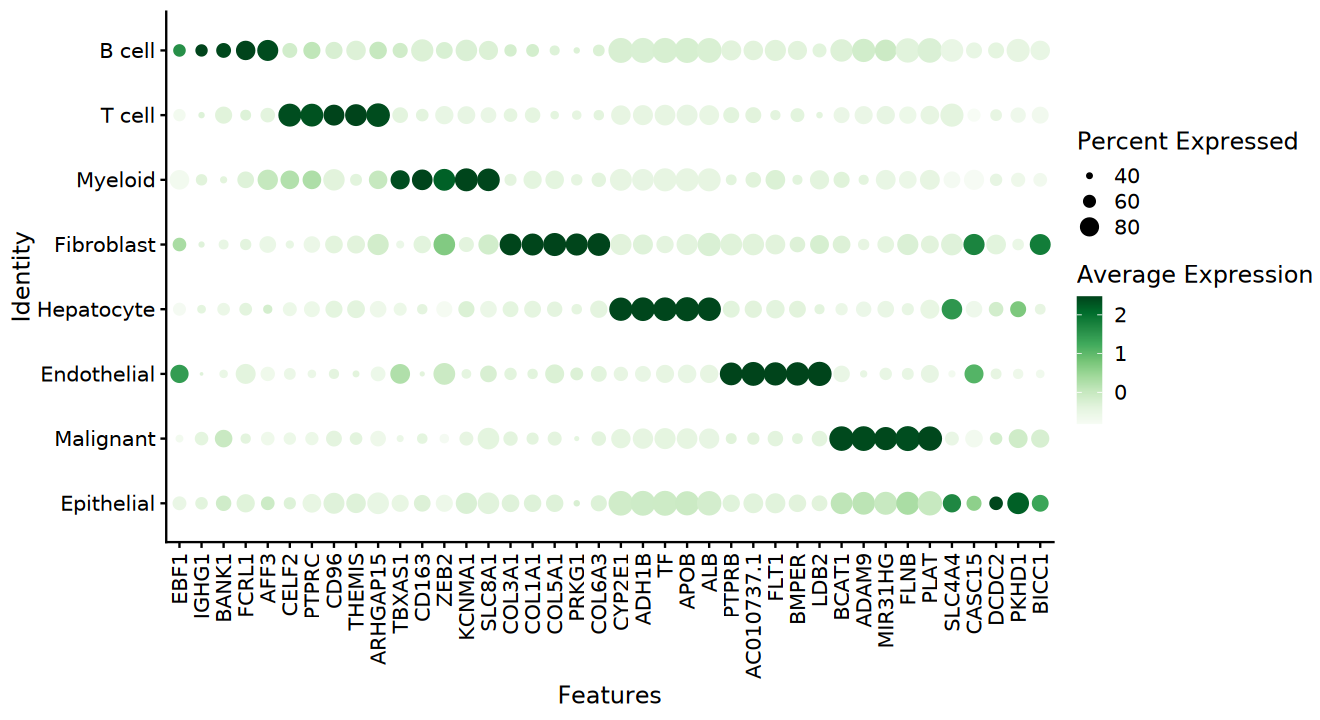

In [13]:
#! Fig S5C

Idents(cmb) <- 'Primary'
# primary_markers <- FindAllMarkers(cmb, verbose=T) # Takes about an hour
# saveRDS(primary_markers, file.path(outdir, 'signatures','primary_markers.RDS'))

# marker_genes <- primary_markers %>%
#     filter(p_val_adj < 0.05) %>%
#     filter(pct.1 > 0.5) %>%
#     # filter(pct.2 < 0.5) %>%
#     group_by(cluster) %>%
#     slice_max(avg_log2FC, n=5) %>% 
#     pull(gene)

# Don't want to recompute so just hard-coding
marker_genes <- c(
    'BICC1', 'PKHD1', 'DCDC2', 'CASC15', 'SLC4A4',
    'PLAT', 'FLNB', 'MIR31HG', 'ADAM9', 'BCAT1',
    'LDB2', 'BMPER', 'FLT1', 'AC010737.1', 'PTPRB',
    'ALB', 'APOB', 'TF', 'ADH1B', 'CYP2E1',
    'COL6A3', 'PRKG1', 'COL5A1', 'COL1A1', 'COL3A1',
    'SLC8A1', 'KCNMA1', 'ZEB2', 'CD163', 'TBXAS1',
    'ARHGAP15', 'THEMIS', 'CD96', 'PTPRC', 'CELF2',
    'AFF3', 'FCRL1', 'BANK1', 'IGHG1', 'EBF1'
)


h <- 6
w <- 11
options(repr.plot.height=h, repr.plot.width=w)
DotPlot(cmb, features=rev(marker_genes)) + 
    # coord_flip() + 
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) +
    scale_colour_gradientn(colours = dotplot_colors)

ggsave(file.path('/home/ubuntu/data/cxcr4-pdac/figures/FigS5C.pdf'), height=h, width=w, device=Cairo::CairoPDF)

In [ ]:
# Just malignant cells on integrated UMAP
source('./helpers/color.R')
w <- 6
h <- 5

malig_cells <- rownames(annotations %>% filter(Primary=='Malignant'))

options(repr.plot.width=w, repr.plot.height=h)
p1 <- DimPlot(cmb, 
                cells.highlight=malig_cells, 
                raster=T) + scale_color_manual(values=colors_only_malig) +
                ggtitle('') + no_ticks + theme(legend.position='none')
p2 <- DimPlot(cmb,
                reduction='pca',
                cells.highlight=malig_cells, 
                raster=T) + scale_color_manual(values=colors_only_malig) +
                ggtitle('') + no_ticks + theme(legend.position='none')
        
out <- p1 + inset_element(p2, 0.75, 0, 1, 0.4)


In [14]:
#! FIGURE 4B, 4C
source('./helpers/color.R')
w <- 6
h <- 6

options(repr.plot.width=w, repr.plot.height=h)
for (mode in c('raster')) {
    r_current <- c('raster'=T, 'vector'=F)[[mode]]
    p1 <- DimPlot(cmb, group='Primary', raster=r_current, raster.dpi=c(1024, 1024), pt.size=1.9) + 
      scale_color_manual(values=colors_primary) + 
      ggtitle('') + no_ticks + NoLegend()
    p2 <- DimPlot(cmb, group='Primary', raster=r_current, reduction='pca', raster.dpi=c(1024, 1024), pt.size=1.9) + 
        scale_color_manual(values=colors_primary) + NoLegend() + ggtitle('') + no_ticks

    ggsave(paste0('/home/ubuntu/data/cxcr4-pdac/figures/new_numbering/Fig4b_', mode, '.pdf'), p1, h=h, w=w)
    ggsave(paste0('/home/ubuntu/data/cxcr4-pdac/figures/new_numbering/Fig4c_', mode, '.pdf'), p2, h=h, w=w)
}



## Patient metadata and static analysis

In [3]:
source('./helpers/add_metadata.R')



# cmb <- combined %>% AddMetaData(annotations)
# cmb <- add_metadata(cmb) 
combined <- add_metadata(combined) 
# malig <- add_metadata(malig)
# non_malig <- add_metadata(non_malig)
# immune <- add_metadata(immune)
# t_comp <- add_metadata(t_comp)
# b_comp <- add_metadata(b_comp)
# myel_comp <- add_metadata(myel_comp)
# fib_comp <- add_metadata(fib_comp)

In [17]:
combined@meta.data %>% group_by(orig.ident, treatment.stage, response, pt.id, broad_annot) %>%
summarize(count = n()) %>%
pivot_wider(values_from = count, names_from=broad_annot) %>%
write.table('/home/ubuntu/tmp/full_data_crosstabs.tsv', sep='\t', row.names=F)

`summarise()` has grouped output by 'orig.ident', 'treatment.stage',
'response', 'pt.id'. You can override using the `.groups` argument.


### Fig S5 signature analysis

In [40]:


sigs <- read.table('/home/ubuntu/data/cxcr4-pdac/signatures/stress_signatures.csv', sep=',', header=T)[-1,]

genelist <- list()
for (i in 1:ncol(sigs)) {
  # if (i != 1) next()
  genes <- sigs[,i]
  genes <- genes[genes != ''] %>% unique()
  # genes <- genes[genes %in% rownames(combined[['RNA']]@counts)]
  colname <- colnames(sigs)[i]

  genelist[[colname]] <- genes
}

# cmb <- cmb %>% UCell::AddModuleScore_UCell(genelist, name='_UCell', assay='RNA')
malig <- malig %>% UCell::AddModuleScore_UCell(genelist, name='_UCell', assay='RNA')
malig <- malig %>% add_metadata()
# non_malig <- non_malig %>% UCell::AddModuleScore_UCell(genelist, name='_UCell', assay='RNA')
# For a single program, 5 sec vs 4:15  in vanilla vs UCell scoring. 
# However, virtually no extra time to run all the signatures at once


Warning message:
“The following genes were not found and will be
                        imputed to exp=0:
* BLOC1S5-TXNDC5,HSP90AB2P,HSP90AB3P,ACN9,ADCK3,ADCK4,APOA1BP,APOPT1,ATP5A1,ATP5B,ATP5C1,ATP5D,ATP5E,ATP5F1,ATP5G1,ATP5G2,ATP5G3,ATP5H,ATP5I,ATP5J,ATP5J2,ATP5J2-PTCD1,ATP5L,ATP5O,ATP5S,ATP5SL,ATP6,ATP8,ATPIF1,C10orf10,C10orf2,C14orf159,C14orf2,C17orf89,C19orf52,C19orf70,C20orf24,C21orf33,C2orf47,C6orf203,C6orf57,C7orf55,CARKD,CCBL2,CCDC109B,CECR5,COX1,COX2,COX3,CYTB,FAM195A,FAM213A,FDX1L,FTMT,FTSJ2,GBAS,GPX1,HRSP12,ICT1,KIAA0141,KIAA0391,LACE1,LYRM5,1-Mar,2-Mar,5-Mar,MINOS1,MRP63,MRP63P6,MRP63P7,MRPL15P1,MRPL20P1,MRPL22P1,MRPL2P1,MRPL32P1,MRPL35P1,MRPL35P2,MRPL35P3,MRPL35P4,MRPL37P1,MRPL3P1,MRPL40P1,MRPL42P2,MRPL42P3,MRPL42P4,MRPL42P6,MRPL45P1,MRPL45P2,MRPL48P1,MRPL49P1,MRPL49P2,MRPL50P1,MRPL50P2,MRPL50P4,MRPL51P2,MRPL53P1,MRPL9P1,MRPS10P1,MRPS10P2,MRPS11P1,MRPS15P1,MRPS16P1,MRPS16P2,MRPS16P3,MRPS17P1,MRPS17P3,MRPS17P9,MRPS18AP1,MRPS18BP1,MRPS18BP2,MRPS18CP4,MRPS18CP6,MRPS21P1,MRP

In [46]:
#! Figure S5A
w <- 10
h <- 10
options(repr.plot.width=w, repr.plot.height=h)

source('./helpers/color.R')


signature_matrix <- function(obj, signature_list, comparison_func, symbol, y_max=0.9){
  obj@meta.data$treatment.stage <- factor(obj@meta.data$treatment.stage,
                                        levels=c('PRE', 'ON_TRT', 'ON_PROG'))
  plot_case <- function(signature){
    column <- paste0(signature, '_UCell')
    # Calculate cohen d
    stat.test <- data.frame(
      `.y.`=rep(column, 3),
      group1=c('PRE', 'ON_TRT', 'PRE'),
      group2=c('ON_TRT', 'ON_PROG', 'ON_PROG'),
      d=c(comparison_func(obj@meta.data %>% filter(treatment.stage=='PRE') %>% .[[column]],
                  obj@meta.data %>% filter(treatment.stage=='ON_TRT') %>% .[[column]]),
          comparison_func(obj@meta.data %>% filter(treatment.stage=='ON_TRT') %>% .[[column]],
                  obj@meta.data %>% filter(treatment.stage=='ON_PROG') %>% .[[column]]),
          comparison_func(obj@meta.data %>% filter(treatment.stage=='PRE') %>% .[[column]],
                  obj@meta.data %>% filter(treatment.stage=='ON_PROG') %>% .[[column]])     
      )
    )

    ggplot(obj@meta.data, aes(treatment.stage, .data[[column]])) +
      geom_jitter(alpha=0.1) +
      geom_violin(aes(fill = treatment.stage)) + 
      geom_boxplot(aes(fill=treatment.stage), width=0.5, outlier.shape=NA) +
        ggpubr::stat_pvalue_manual(stat.test, 
                                   label = paste0(symbol, 
                                                  " = {round(d, 3)}"), 
                                   y.position=c(0.6, 0.7, 0.8)) +
      theme_classic() + NoLegend() + 
      scale_fill_manual(values=colors_treatment_stage) +
      xlab('') +
      ylim(0, y_max)
  }
  purrr::map(signature_list, plot_case) %>% cowplot::plot_grid(plotlist = .)
}

cohen_d <- function(sample1, sample2) {
  (mean(sample1)-mean(sample2))/sqrt((var(sample1) + var(sample2))/2)
}
wilcox_location <- function(sample1, sample2) {
  wilcox.test(sample1, sample2, conf.int=T)$estimate
}
gene_sigs <- colnames(sigs)
comparisons <- list(c('PRE', 'ON_TRT'), 
                       c('ON_TRT', 'ON_PROG'), 
                       c('PRE', 'ON_PROG'))

# p1 <- signature_matrix(cmb, gene_sigs, cohen_d, 'D')
# p2 <- signature_matrix(cmb, gene_sigs, wilcox_location, 'Δ')
# ggsave('/home/ubuntu/data/cxcr4-pdac/figures/FigS1_combined_cohen.png', p1, width=w, height=h)
# ggsave('/home/ubuntu/data/cxcr4-pdac/figures/FigS1_combined_wilcox.png', p2, width=w, height=h)

p1 <- signature_matrix(malig, gene_sigs, cohen_d, 'D')
p2 <- signature_matrix(malig, gene_sigs, wilcox_location, 'Δ')
# ggsave('/home/ubuntu/data/cxcr4-pdac/figures/FigS1_malig_wilcox.png', p2, width=w, height=h)
ggsave('/home/ubuntu/data/cxcr4-pdac/figures/FigS5A.pdf', p1, width=w, height=h)

# p1 <- signature_matrix(non_malig, gene_sigs, cohen_d, 'D')
# p2 <- signature_matrix(non_malig, gene_sigs, wilcox_location, 'Δ')
# ggsave('/home/ubuntu/data/cxcr4-pdac/figures/FigS1_non_malig_cohen.png', p1, width=w, height=h)
# ggsave('/home/ubuntu/data/cxcr4-pdac/figures/FigS1_non_malig_wilcox.png', p2, width=w, height=h)
# Takes about 2 min to plot


Warning message:
“Removed 692 rows containing missing values or values outside the scale range
(`geom_point()`).”


Warning message:
“Removed 1133 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 6603 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 2197 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 12 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 23 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 158 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 684 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 1134 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 6645 rows containing missing values or values outside the sc

In [ ]:
zone <- function(x) paste0(round(mean(x) - sd(x), 3), ' , ', round(mean(x) + sd(x), 3))

tmp@meta.data %>%
  group_by(treatment.stage) %>%
  summarize(stress_module1 = zone(stress_module_UCell),
            mito_module1 = zone(mito_module_UCell),
            IFN_module1 = zone(IFN_module_UCell),
            Ig_module1 = zone(Ig_module_UCell),
            stress_marsh1 = zone(stress_marsh_UCell),
            stress_vanhove1 = zone(stress_vanhove_UCell),
            stress_brink1 = zone(stress_brink_UCell),
            stress_denisenko1 = zone(stress_denisenko_UCell))

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


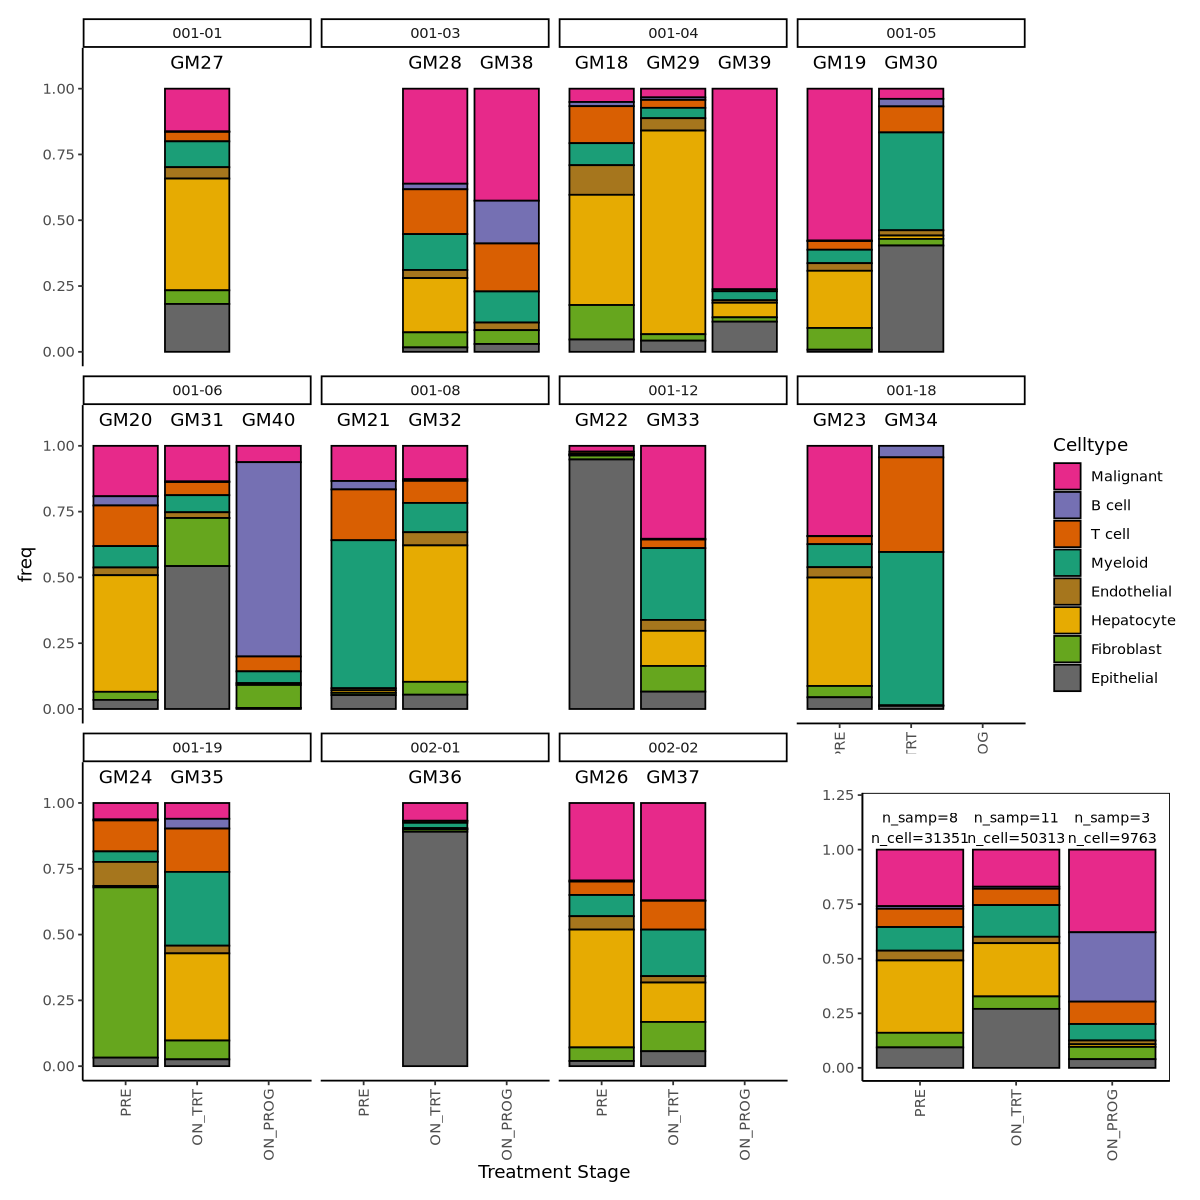

In [53]:
#! Figure S5B

n_samp <- cmb@meta.data %>% 
    select(treatment.stage, orig.ident) %>% unique() %>%
    group_by(treatment.stage) %>% summarize(n_samp=n()) 
n_cell <- cmb@meta.data %>% 
    group_by(treatment.stage) %>% summarize(n_cell=n()) 
samplesize <- merge(n_samp, n_cell) %>% 
       mutate(msg = paste0('n_samp=', n_samp, '\nn_cell=', n_cell))
samplenames <- cmb@meta.data %>% 
    select(treatment.stage, pt.id, orig.ident) %>% unique()


source('./helpers/color.R')
base <- ggplot(cmb@meta.data, 
              aes(x = factor(treatment.stage, levels=c('PRE', 'ON_TRT', 'ON_PROG')))) +
        geom_bar(aes(fill = factor(Primary, 
                     levels=c('Malignant', 'B cell', 'T cell', 'Myeloid', 
                     'Endothelial', 'Hepatocyte', 'Fibroblast', 'Epithelial')
                     )),
          position="fill", color='black') + 
        guides(fill=guide_legend(title="Celltype")) +
        scale_fill_brewer(palette='Set1') + 
        theme_classic() + 
        theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) + 
        xlab('Treatment Stage') + 
        scale_y_continuous('freq', c(0,.25,.5,.75,1.0), c(0,.25,.5,.75,1.0), c(0,1.1)) +
        scale_fill_manual(values=colors_primary)


p1 <- base +
        geom_text(data=samplesize, aes(label=msg, y=1.1), size=3) + 
        theme(legend.position='none', panel.border = element_rect(colour = "black", fill=NA)) + ggtitle('') + 
        xlab('') + ylab('') + ylim(0,1.2)
p2 <- base +
        facet_wrap(~pt.id) + 
        geom_text(data=samplenames, aes(label=orig.ident, y=1.1))


options(repr.plot.width=10, repr.plot.height=10)
out <- p2 + inset_element(p1, 0.66, 0, 0.99, 0.37, align_to='full')
out
ggsave('/home/ubuntu/data/cxcr4-pdac/figures/FigS5B.pdf', out, height=10, width=10)
  

## MiloR dynamic analysis

In [15]:
library(miloR)
library(SingleCellExperiment)
##library(scater)
library(tidyverse)
library(patchwork)
library(Seurat)
library(beeswarm)

source('./helpers/add_metadata.R')
scaled_changes <- metadata$pct.change %>% 
  unique() %>% as.data.frame() 
colnames(scaled_changes) <- 'pct.change'
scaled_changes <-  mutate(scaled_changes, scaled.change = scale(pct.change))

prepare_milo_subset <- function(subset, outfile, k=50, d=30, prop=0.1, 
                                redo=F, calc_distance=F) {
      # With `redo`, you can experiment with optimal param values to get
      # proper nhood size. Once optimal values are found, rerun with
      # both `redo` and `calc_distance` on.
      if (!file.exists(outfile) || redo) {
            subset[['barcodes']] <- rownames(subset@meta.data)
            # Create a single cell experiment object
            combined_sce <- as.SingleCellExperiment(subset)


            # Takes about 2 min
            combined_milo <- Milo(combined_sce)
            traj_milo <- buildGraph(combined_milo, k=k, d=d)
            traj_milo <- makeNhoods(traj_milo, prop=prop, k=k, d=d, refined = TRUE)
            p_hist <- plotNhoodSizeHist(traj_milo)

            milo.meta <- subset@meta.data
            traj_milo <- countCells(traj_milo, samples="orig.ident", meta.data=milo.meta)
            # head(nhoodCounts(traj_milo))

            if (calc_distance) {
              traj_milo <- calcNhoodDistance(traj_milo, d=d)  # Takes like an hour
              out <- list('traj_milo'=traj_milo, 'milo.meta'=milo.meta, 'nhood_hist'=p_hist)
              saveRDS(out, outfile)
            } # 

            out <- list('traj_milo'=traj_milo, 'milo.meta'=milo.meta, 'nhood_hist'=p_hist)
                 
      } else {
            out <- readRDS(outfile)
      }
      return(out)
}


plot_DA <- function(res, title, group.by='Secondary') {
  source('./helpers/color.R')

  grp_levels <- res[[group.by]] %>% unique() %>% sort() %>% rev()
  res[[group.by]] <- factor(res[[group.by]], levels = grp_levels)
  smmry <- res %>% 
            group_by(pick({{ group.by }})) %>% 
            summarize(cog = weighted.mean(logFC, 
                                          w=nh_size/sum(nh_size))) %>% ungroup()
  smmry$xval <- as.numeric(smmry[[group.by]])
  # print(head(smmry))
  
  p <- plotDAbeeswarm(res, group.by = group.by, alpha=0.8) + # aes(size=nh_size) +
          # geom_jitter(height = 0.25, aes(size = nh_size)) +  # Is this strictly necessary?
          geom_violin(aes(group= .data[[group.by]], color=NULL, size=NULL),
                      scale = 'width', alpha = 0) +
          geom_hline(aes(yintercept=0, size=NULL)) +
          geom_point(data=smmry, aes(y=cog, x=xval, size=NULL), color='black', size=3) +
          # geom_text(data=smmry, aes(y=cog+0.3, x=xval, label=round(xval, 3)))  +  # Can comment this line out for pretty version
          ggtitle(title) + xlab('') + swarm_plot_theme + swarm_plot_colors
  
  return(list('p'=p, 'smmry'=smmry))
}

run_milo_pipeline <- function(subset, stage, annot_level='granular', h=15, w=7, reverse_direction=F) {
  
  swap_sides <- function(design_string) {
    parts <- strsplit(design_string, "-")[[1]]
    swapped <- paste0(parts[2], ' - ', parts[1])
    return(swapped)
  }

  traj_milo <- subset[['traj_milo']]
  milo.meta <- subset[['milo.meta']]

  all_barcodes <- rownames(milo.meta)
  milo.meta <- milo.meta %>% merge(scaled_changes, how='left', on='pct.change')
  rownames(milo.meta) <- all_barcodes
  

  # Design matrix part
  thy.design <- data.frame(milo.meta)[,c("orig.ident", 
                                                'pt.id',
                                                "treatment.stage", 
                                                "response", 
                                                'pct.change',
                                                'scaled.change')]
  thy.design <- distinct(thy.design)
  rownames(thy.design) <- thy.design$orig.ident
  thy.design <- thy.design[colnames(nhoodCounts(traj_milo)), , drop=FALSE]
  
  if (stage == 'TRT_PR_vs_NR') {
    thy.design <- thy.design %>% 
                  mutate(progresponse = ifelse(treatment.stage == 'ON_TRT',
                                            ifelse(response=='PR', 'ON_TRT_PR', 'ON_TRT_NR'),
                                            'BLAH')) 

    contrast_string <- 'progresponseON_TRT_PR - progresponseON_TRT_NR'
    trt_stage <- 'ON_TRT_PR'
    other <- 'ON_TRT_NR'

    if (reverse_direction) {
      contrast_string <- swap_sides(contrast_string)
      tmp <- trt_stage
      trt_stage <- other
      other <- tmp
    }


    design.df <- model.matrix(~ 0 + progresponse, data=thy.design)
    milo.res <- testNhoods(traj_milo, 
                            design=formula(~ 0 + progresponse), 
                            design.df=thy.design, 
                            model.contrasts = contrast_string, 
                            fdr.weighting="graph-overlap")
  } else if (stage == 'PRE_PR_vs_NR') {  # Yes I know it's inefficient, will refactor later
    thy.design <- thy.design %>% 
                  mutate(progresponse = ifelse(treatment.stage == 'PRE',
                                            ifelse(response=='PR', 'PRE_PR', 'PRE_NR'),
                                            'BLAH')) 

    contrast_string <- 'progresponsePRE_PR - progresponsePRE_NR'
    trt_stage <- 'PRE_PR'
    other <- 'PRE_NR'


    if (reverse_direction) {
      contrast_string <- swap_sides(contrast_string)
      tmp <- trt_stage
      trt_stage <- other
      other <- tmp
    }

    design.df <- model.matrix(~ 0 + progresponse, data=thy.design)
    milo.res <- testNhoods(traj_milo, 
                            design=formula(~ 0 + progresponse), 
                            design.df=thy.design, 
                            model.contrasts = contrast_string, 
                            fdr.weighting="graph-overlap")
  } else if (stage != 'change_scaled') {
    if (stage == 'PRE') {
      contrast_string <- 'treatment.stagePRE - (treatment.stageON_TRT + treatment.stageON_PROG)/2'
      trt_stage <- 'PRE'
      other <- 'ON_TRT/ON_PROG'
    } else if (stage == 'ON_TRT') {
      contrast_string <- 'treatment.stageON_TRT - (treatment.stagePRE + treatment.stageON_PROG)/2'
      trt_stage <- 'ON_TRT'
      other <- 'PRE/ON_PROG'
    } else if (stage == 'ON_PROG') {
      contrast_string <- 'treatment.stageON_PROG - (treatment.stagePRE + treatment.stageON_TRT)/2'
      trt_stage <- 'ON_PROG'
      other <- 'PRE/ON_TRT'
    } else if (stage == 'ON_TRT-PRE') {
      contrast_string <- 'treatment.stageON_TRT - treatment.stagePRE'
      trt_stage <- 'ON_TRT'
      other <- 'PRE'
    } else if (stage == 'ON_PROG-PRE') {
      contrast_string <- 'treatment.stageON_PROG - treatment.stagePRE'
      trt_stage <- 'ON_PROG'
      other <- 'PRE'
    } else if (stage == 'ON_PROG-ON_TRT') {
      contrast_string <- 'treatment.stageON_PROG - treatment.stageON_TRT'
      trt_stage <- 'ON_PROG'
      other <- 'ON_TRT'
    }

    if (reverse_direction) {
      contrast_string <- swap_sides(contrast_string)
      tmp <- trt_stage
      trt_stage <- other
      other <- tmp
    }
  
    design.df <- model.matrix(~ 0 + treatment.stage, data=thy.design)
    milo.res <- testNhoods(traj_milo, 
                            design=formula(~ 0 + treatment.stage), 
                            design.df=thy.design, 
                            model.contrasts = contrast_string, 
                            fdr.weighting="graph-overlap")
  } else if (stage == 'change_scaled') {

    if (reverse_direction) {
      stop('Option is incompatible')
    }
    design.df <- model.matrix(~ scaled.change, data=thy.design)
    milo.res <- testNhoods(traj_milo, 
                            design=formula(~ scaled.change), 
                            design.df=thy.design, 
                            fdr.weighting="graph-overlap")
    trt_stage <- 'Worse response'
    other <- 'Better response'
  }

  design <- paste0(other, ' ~ ', trt_stage)

  
  da_results <- milo.res
  da_results %>%
    arrange(-SpatialFDR) %>%
    head()
  da_results$nh_size = colSums(nhoods(traj_milo))

  # p1 <- ggplot(da_results, aes(PValue)) + geom_histogram(bins=50) + ggtitle(stage)
  # p2 <- ggplot(da_results, aes(logFC, -log10(SpatialFDR))) + 
  #   geom_point() +
  #   geom_hline(yintercept = 0.03) +
  #   ggtitle(stage)


  # annotate neighborhoods as per manual annotation
  if (annot_level == 'granular') {
    coldata_col <- 'Secondary' # 'granular_annot'
  } else if (annot_level == 'broad') {
    coldata_col <- 'broad_annot'
  }
  da_results <- annotateNhoods(traj_milo, da_results, coldata_col = coldata_col)
  traj_milo <- buildNhoodGraph(traj_milo)
  # p3 <- plotNhoodGraphDA(traj_milo, da_results, layout="UMAP",alpha=0.05) + ggtitle(stage)

  # New version of swarm plot
  options(repr.plot.height=h, repr.plot.width=w)
  out <- plot_DA(da_results, design, coldata_col)

  return(out)
}


if (!dir.exists('/home/ubuntu/data/cxcr4-pdac/figures/milo')) dir.create('/home/ubuntu/data/cxcr4-pdac/figures/milo')
generate_DA_files <- function(compartment, traj_obj, h, w, annot_level='granular', reverse_direction=F) {
  outdir <- file.path('/home/ubuntu/data/cxcr4-pdac/figures/milo', compartment)
  if (!dir.exists(outdir)) dir.create(outdir)
  comparisons <- c('PRE', 'ON_TRT', 'ON_PROG', 'change_scaled', 
                  'ON_TRT-PRE', 'ON_PROG-PRE', 'ON_PROG-ON_TRT', 
                  'TRT_PR_vs_NR', 'PRE_PR_vs_NR')
  out <- list()
  for (stage in comparisons) {
    outfile <- file.path(outdir, paste0(compartment, '_', stage, '.pdf'))
    outfile_tbl <- file.path(outdir, paste0(compartment, '_', stage, '.tsv'))
    if (!file.exists(outfile)) {
      tryCatch({
        set.seed(12345)
        message_('Running Milo pipeline for comparison: ', stage)
        out[[stage]] <- run_milo_pipeline(traj_obj, stage, annot_level=annot_level, h=h, w=w, reverse_direction=reverse_direction)
        ggsave(outfile, out[[stage]][['p']], height=h, width=w)
        write.table(out[[stage]][['smmry']], file=outfile_tbl, sep='\t')
        message_('Saved to ', outfile)
      }, error = function(cond) { 
        out[[stage]] <- NA
        message_('Failed to create ', outfile)
        message_(cond)
        file.remove(outfile)
      }, finally = {
          NA
      })
    } else {
      message_('Skipping: ', outfile, ' already exists.')
    }
  }
  return(out)
}


make_compartment_crosstabs <- function(compartment, outfile) {
  compartment@meta.data %>% 
    group_by(granular_annot, orig.ident) %>% 
    summarize(count=n()) %>%
    ungroup() %>%
    arrange(orig.ident, granular_annot) %>%
    pivot_wider(names_from=orig.ident, values_from=count) %>%
    mutate(total = rowSums(select(., contains("GM")), na.rm=T), 
          .after=granular_annot) %>%
    mutate(total_pre = rowSums(select(., any_of(paste0('GM', 18:26))),
                               na.rm=T), .after=total) %>%
    mutate(total_on_trt = rowSums(select(., any_of(paste0('GM', 27:37))),
                                  na.rm=T), .after=total_pre) %>%
    mutate(total_on_prog = rowSums(select(., any_of(paste0('GM', 38:40))),
                                  na.rm=T), .after=total_on_trt) %>%
    mutate(total_PD = rowSums(select(., any_of(paste0('GM', c(19, 30)))),
                                  na.rm=T), .after=total_on_prog) %>%
    mutate(total_SD = rowSums(select(., any_of(paste0('GM', c(17, 25, 26, 28, 36, 37, 38)))),
                                  na.rm=T), .after=total_PD) %>%
    mutate(total_PR = rowSums(select(., any_of(paste0('GM', c(16,18,20,21,22,23,24,27,29,31,32,33,34,35,39,40)))),
                                  na.rm=T), .after=total_SD) %>%
    mutate(total_PR_pre = rowSums(select(., any_of(paste0('GM', c(16, 18, 20, 21, 22, 23, 24)))),
                                  na.rm=T), .after=total_PR) %>%
    mutate(total_NR_pre = rowSums(select(., any_of(paste0('GM', c(17, 19, 25, 26)))),
                                  na.rm=T), .after=total_PR_pre) %>%
    write.table(outfile, sep='\t', row.names = F)
}


Warning message:
“package ‘miloR’ was built under R version 4.3.2”
Loading required package: edgeR

Warning message:
“package ‘edgeR’ was built under R version 4.3.2”
Loading required package: limma

Warning message:
“package ‘limma’ was built under R version 4.3.2”
Warning message:
“package ‘SingleCellExperiment’ was built under R version 4.3.2”
Loading required package: SummarizedExperiment

Warning message:
“package ‘SummarizedExperiment’ was built under R version 4.3.2”
Loading required package: MatrixGenerics

Warning message:
“package ‘MatrixGenerics’ was built under R version 4.3.2”
Loading required package: matrixStats

Warning message:
“package ‘matrixStats’ was built under R version 4.3.2”

Attaching package: ‘matrixStats’


The following object is masked from ‘package:dplyr’:

    count



Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummax

In [ ]:
# cmb_traj <- prepare_milo_subset(combined, '~/tmp/traj_milo.rds', k=28, d=30, prop=0.15, redo=T, calc_distance = F)
# print(cmb_traj[['nhood_hist']] + scale_x_continuous(breaks=seq(0, 250, 20)) + xlim(0, 150))
# Optimize different values so that peak lies between 50-100, then run again with `calc_distance` on.

cmb_traj <- prepare_milo_subset(combined, '~/tmp/traj_milo.rds', 
                                k=28, d=30, prop=0.15, 
                                redo=F, calc_distance = F)

out_cmb <- generate_DA_files('combined', cmb_traj, h=7, w=8, annot_level='broad', reverse_direction=T)
rm(cmb_traj); gc()

### FINAL COMPARTMENTS and MiloR analysis

These are the FINAL compartments because we read their annotations from the updated annotations RDS file and reprocess the subset

#### Endothelial

In [ ]:
# Endothelial
annotations <- make_granular_labels()
end_comp <- subset(non_malig, 
                 cells=annotations %>% 
                        filter(Primary %in% c('Endothelial')) %>%
                        rownames(.)) %>%
              reprocess_subset(name='Endothelial_final', assay='RNA') %>%
              add_metadata()

# end_traj <- prepare_milo_subset(end_comp, '~/tmp/end_traj_milo.rds', 
#                                 k=35, d=30, prop=0.15, redo=T, calc_distance = T)
# print(end_traj[['nhood_hist']] + scale_x_continuous(breaks=seq(0, 250, 20)) + xlim(0, 150))
end_traj <- prepare_milo_subset(end_comp, '~/tmp/end_traj_milo.rds', 
                                k=35, d=30, prop=0.15, redo=F, calc_distance=F)


h <- 7
w <- 8
out_end <- generate_DA_files('endothelial', end_traj, h=h, w=w, reverse_direction=T)
rm(end_traj); gc()

make_compartment_crosstabs(end_comp, '/home/ubuntu/tmp/end_comp_crosstabs.tsv')

#### Fibroblast

Here we generate data for #! Figure 4E, 4F, S7C, S7D

In [21]:
annotations <- make_granular_labels()
fib_comp <- fib_comp <- subset(non_malig, 
                   cells=annotations %>% 
                        filter(Primary %in% c('Fibroblast')) %>%
                        rownames(.)) %>%
              reprocess_subset(name='Fibroblast_final', assay='RNA') %>%
              add_metadata()
# fib_traj <- prepare_milo_subset(fib_comp, '~/tmp/fib_traj_milo.rds', 
#                                  k=35, d=30, prop=0.15, redo=T, calc_distance = T)
# print(fib_traj[['nhood_hist']] + scale_x_continuous(breaks=seq(0, 250, 20)) + xlim(0, 150))
fib_traj <- prepare_milo_subset(fib_comp, '~/tmp/fib_traj_milo.rds', 
                                k=35, d=30, prop=0.15, redo=F, calc_distance=T)


h <- 7
w <- 8

# Manual renaming
cxcl12_fibs <- fib_traj$milo.meta %>% 
     filter(granular_annot %in% 'Fibroblast::CXCL12+ fibr.') %>%
     rownames()
fib_traj$milo.meta[cxcl12_fibs, 'granular_annot'] <- 'Fibroblast::Proaxonogenic CXCL12+ fibr.'
fib_traj$milo.meta[cxcl12_fibs, 'Secondary'] <- 'Proaxonogenic CXCL12+ fibr.'
fib_traj$traj_milo[, cxcl12_fibs]$granular_annot <- 'Fibroblast::Proaxonogenic CXCL12+ fibr.'
fib_traj$traj_milo[, cxcl12_fibs]$Secondary <- 'Proaxonogenic CXCL12+ fibr.'



out_fib <- generate_DA_files('fibroblast', fib_traj, h=h, w=w, reverse_direction=T)
# rm(fib_traj); gc()

make_compartment_crosstabs(fib_comp, '/home/ubuntu/tmp/fib_comp_crosstabs.tsv')

2025-12-04 21:54:22.508903: Reading from  /home/ubuntu/data/cxcr4-pdac/combine_samples/Fibroblast_final_RNA.RDS

2025-12-04 21:55:49.447248: Skipping:  /home/ubuntu/data/cxcr4-pdac/figures/milo/fibroblast/fibroblast_PRE.pdf  already exists.

2025-12-04 21:55:49.449178: Skipping:  /home/ubuntu/data/cxcr4-pdac/figures/milo/fibroblast/fibroblast_ON_TRT.pdf  already exists.

2025-12-04 21:55:49.45093: Skipping:  /home/ubuntu/data/cxcr4-pdac/figures/milo/fibroblast/fibroblast_ON_PROG.pdf  already exists.

2025-12-04 21:55:49.452619: Running Milo pipeline for comparison:  change_scaled

2025-12-04 21:55:49.560561: Failed to create  /home/ubuntu/data/cxcr4-pdac/figures/milo/fibroblast/fibroblast_change_scaled.pdf

2025-12-04 21:55:49.562233: Error in run_milo_pipeline(traj_obj, stage, annot_level = annot_level, : Option is incompatible


Warning message in file.remove(outfile):
“cannot remove file '/home/ubuntu/data/cxcr4-pdac/figures/milo/fibroblast/fibroblast_change_scaled.pdf', reason 'No 

In [35]:
Idents(fib_comp) <- 'Secondary'
# fib_final_markers <- FindAllMarkers(fib_comp)
# write.table(fib_final_markers, '/home/ubuntu/tmp/fib_final_markers.tsv', sep='\t', row.names=F)
fib_final_markers <- read.table('/home/ubuntu/tmp/fib_final_markers.tsv', sep='\t', header=T)

In [41]:
fib_final_markers %>% 
    filter(cluster=='CXCL12+ fibr.') %>% 
    filter(p_val_adj < 0.05) %>% 
    arrange(-avg_log2FC) %>% 
    filter(pct.1 > 0.5) %>% 
    filter(pct.2 < 0.5) %>%
    write.table('/home/ubuntu/tmp/fib_final_markers_cxcl12.tsv', sep='\t', row.names=F)  # Used for the TCGA analysis in Figure S5c

#### Epithelial

In [ ]:
annotations <- make_granular_labels()
epi_comp <- epi_comp <- subset(non_malig, 
                   cells=annotations %>% 
                        filter(Primary %in% c('Epithelial')) %>%
                        rownames(.)) %>%
              reprocess_subset(name='Epithelial_final', assay='RNA') %>%
              add_metadata()
# epi_traj <- prepare_milo_subset(epi_comp, '~/tmp/epi_traj_milo.rds', 
#                                  k=35, d=30, prop=0.15, redo=T, calc_distance = T)
# print(epi_traj[['nhood_hist']] + scale_x_continuous(breaks=seq(0, 250, 20)) + xlim(0, 150))
epi_traj <- prepare_milo_subset(epi_comp, '~/tmp/epi_traj_milo.rds', 
                                 k=35, d=30, prop=0.15, redo=F, calc_distance=F)


h <- 5
w <- 7
out_epi <- generate_DA_files('epithelial', epi_traj, h=h, w=w, reverse_direction=T)
rm(epi_traj); gc()

make_compartment_crosstabs(epi_comp, '/home/ubuntu/tmp/epi_comp_crosstabs.tsv')

#### T cell

In [ ]:
annotations <- make_granular_labels()
t_comp <- subset(non_malig, 
                   cells=annotations %>% 
                        filter(Primary %in% c('T cell')) %>%
                        rownames(.)) %>%
              reprocess_subset(name='T_final', assay='RNA') %>%
              add_metadata()
# t_traj <- prepare_milo_subset(t_comp, '~/tmp/t_traj_milo.rds', 
#                                  k=35, d=30, prop=0.15, redo=T, calc_distance = F)
# print(t_traj[['nhood_hist']] + scale_x_continuous(breaks=seq(0, 250, 20)) + xlim(0, 150))

t_traj <- prepare_milo_subset(t_comp, '~/tmp/t_traj_milo.rds', 
                                 k=35, d=30, prop=0.15, redo=F, calc_distance=F)


h <- 4
w <- 7
out_t  <- generate_DA_files('tcell', t_traj, h=h, w=w, reverse_direction=T) 
rm(t_traj); gc()

make_compartment_crosstabs(t_comp, '/home/ubuntu/tmp/t_comp_crosstabs.tsv')

#### B cell

In [ ]:
annotations <- make_granular_labels()
b_comp <- subset(non_malig, 
                   cells=annotations %>% 
                        filter(Primary %in% c('B cell')) %>%
                        rownames(.)) %>%
              reprocess_subset(name='B_final', assay='RNA') %>%
              add_metadata()
# b_traj <- prepare_milo_subset(b_comp, '~/tmp/b_traj_milo.rds', 
#                                  k=25, d=30, prop=0.15, redo=T, calc_distance = F)
# print(b_traj[['nhood_hist']] + scale_x_continuous(breaks=seq(0, 250, 20)) + xlim(0, 150))
b_traj <- prepare_milo_subset(b_comp, '~/tmp/b_traj_milo.rds', 
                                 k=25, d=30, prop=0.15, redo=F, calc_distance = F)


h <- 3
w <- 7
out_b <- generate_DA_files('bcell', b_traj, h=h, w=w, reverse_direction=T)  
rm(b_traj); gc()

make_compartment_crosstabs(b_comp, '/home/ubuntu/tmp/b_comp_crosstabs.tsv')

#### Myeloid

In [ ]:
annotations <- make_granular_labels()
myel_comp <- subset(non_malig, 
                   cells=annotations %>% 
                        filter(Primary %in% c('Myeloid')) %>%
                        rownames(.)) %>%
              reprocess_subset(name='Myeloid_final', assay='RNA') %>%
              add_metadata()
# myel_traj <- prepare_milo_subset(myel_comp, '~/tmp/myel_traj_milo.rds', 
#                                  k=35, d=30, prop=0.15, redo=T, calc_distance = F)
# print(myel_traj[['nhood_hist']] + scale_x_continuous(breaks=seq(0, 250, 20)) + xlim(0, 150))
myel_traj <- prepare_milo_subset(myel_comp, '~/tmp/myel_traj_milo.rds', 
                                 k=35, d=30, prop=0.15, redo=F, calc_distance=F)

h <- 4
w <- 8
out_myel <- generate_DA_files('myeloid', myel_traj, h=h, w=w, reverse_direction=T)
rm(myel_traj); gc()

make_compartment_crosstabs(myel_comp, '/home/ubuntu/tmp/myel_comp_crosstabs.tsv')

#### Immune

Here we generate data for #! Figure 4E, 4F, S8A, S8B

In [16]:
annotations <- make_granular_labels()
imm_comp <- subset(non_malig, 
                   cells=annotations %>% 
                        filter(Primary %in% c('B cell', 'T cell','Myeloid')) %>%
                        rownames(.)) %>%
              reprocess_subset(name='Immune_final', assay='RNA') %>%
              add_metadata()
# imm_traj <- prepare_milo_subset(imm_comp, '~/tmp/imm_traj_milo.rds', 
#                                  k=35, d=30, prop=0.15, redo=T, calc_distance = F)
# print(imm_traj[['nhood_hist']] + scale_x_continuous(breaks=seq(0, 250, 20)) + xlim(0, 150))
imm_traj <- prepare_milo_subset(imm_comp, '~/tmp/imm_traj_milo.rds', 
                                 k=35, d=30, prop=0.15, redo=F, calc_distance = F)

# This block manually overrides `Secondary` so it can be properly grouped
imm_meta <- imm_traj[['milo.meta']]
imm_meta <- imm_meta %>% mutate(Secondary = paste0(substr(Primary, 1, 1), ':', Secondary))
imm_traj[['milo.meta']] <- imm_meta 
imm_traj_milo <- imm_traj[['traj_milo']]
colData(imm_traj_milo)$Secondary <- imm_meta$Secondary
imm_traj[['traj_milo']] <- imm_traj_milo
rm(imm_traj_milo); gc()

h <- 8
w <- 8
out_imm <- generate_DA_files('immune', imm_traj, h=h, w=w, reverse_direction=F)
rm(imm_traj); gc()

make_compartment_crosstabs(imm_comp, '/home/ubuntu/tmp/imm_comp_crosstabs.tsv')

2025-12-04 21:46:49.163531: Reading from  /home/ubuntu/data/cxcr4-pdac/combine_samples/Immune_final_RNA.RDS

Constructing kNN graph with k:35

Checking valid object

Running refined sampling with reduced_dim

Checking meta.data validity

Counting cells in neighbourhoods



,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,9456485,505.1,17877052,954.8,17877052,954.8
Vcells,5048836901,38519.6,7572250476,57771.7,5297644966,40417.9


2025-12-04 21:48:04.504186: Skipping:  /home/ubuntu/data/cxcr4-pdac/figures/milo/immune/immune_PRE.pdf  already exists.

2025-12-04 21:48:04.506234: Skipping:  /home/ubuntu/data/cxcr4-pdac/figures/milo/immune/immune_ON_TRT.pdf  already exists.

2025-12-04 21:48:04.50806: Skipping:  /home/ubuntu/data/cxcr4-pdac/figures/milo/immune/immune_ON_PROG.pdf  already exists.

2025-12-04 21:48:04.509763: Skipping:  /home/ubuntu/data/cxcr4-pdac/figures/milo/immune/immune_change_scaled.pdf  already exists.

2025-12-04 21:48:04.511376: Skipping:  /home/ubuntu/data/cxcr4-pdac/figures/milo/immune/immune_ON_TRT-PRE.pdf  already exists.

2025-12-04 21:48:04.512959: Skipping:  /home/ubuntu/data/cxcr4-pdac/figures/milo/immune/immune_ON_PROG-PRE.pdf  already exists.

2025-12-04 21:48:04.514572: Skipping:  /home/ubuntu/data/cxcr4-pdac/figures/milo/immune/immune_ON_PROG-ON_TRT.pdf  already exists.

2025-12-04 21:48:04.516112: Skipping:  /home/ubuntu/data/cxcr4-pdac/figures/milo/immune/immune_TRT_PR_vs_NR.pdf

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,9462658,505.4,17877052,954.8,17877052,954.8
Vcells,5048821113,38519.5,7572250476,57771.7,5297644966,40417.9


`summarise()` has grouped output by 'granular_annot'. You can override using
the `.groups` argument.


## Immune/Fibroblast plots

Pretty versions of fibroblast and immune compartments, with DA. Use the final compartment RDS files from the MiloR analysis.

In [17]:
imm_comp <- imm_comp %>% AddMetaData(make_granular_labels())
# t_comp <- t_comp %>% AddMetaData(make_granular_labels())
# b_comp <- b_comp %>% AddMetaData(make_granular_labels())
# myel_comp <- myel_comp %>% AddMetaData(make_granular_labels())
# epi_comp <- epi_comp %>% AddMetaData(make_granular_labels())
# end_comp <- end_comp %>% AddMetaData(make_granular_labels())

In [ ]:
#! DE For S8C

t_comp <- subset(imm_comp, subset=Primary=='T cell')
Idents(t_comp) <- 'effective.treatment.stage'
t_stage_markers <- FindAllMarkers(t_comp)

marker_genes <- t_stage_markers %>% filter(p_val_adj < 0.05, avg_log2FC > 0)  %>% group_by(cluster) %>% top_n(30, avg_log2FC)
marker_genes <- marker_genes[!(marker_genes$gene %in% c('MALAT1')),]



h <- 15
w <- 8
options(repr.plot.width=h, repr.plot.height=w)
Idents(t_comp) <- 'effective.treatment.stage'


#! Figure S8C
DotPlot(t_comp, features=c(marker_genes$gene)) +
    coord_flip() + scale_color_gradientn(colours = dotplot_colors)
ggsave('/home/ubuntu/data/cxcr4-pdac/figures/FigS8C.pdf', height=h, width=w, device=Cairo::CairoPDF)


marker_genes %>% filter(cluster=='Treatment\nw/o progression') %>% pull(gene) %>% cat(sep='\n')

In [ ]:
# titrate_UMAP(imm_comp, 'Immune_final_rna', assay='RNA', group.by='Secondary')
imm_comp <- titrate_UMAP(imm_comp, 'Immune_final_rna', assay='RNA', 
             final_params=list('dims'=20,'epochs'=200, 'neighbors'=30, 'resolution'=0.8))

In [ ]:

source('./helpers/color.R')
w <- 5.5
h <- 7
options(repr.plot.width=w, repr.plot.height=h)


options(repr.plot.width=w, repr.plot.height=h)
p1 <- DimPlot(imm_comp, group='Secondary', raster=T) + 
      scale_color_manual(values=colors_immune_comp, breaks=names(colors_immune_comp)) +
      ggtitle('') + no_ticks + theme(legend.position='bottom') +
      guides(color=guide_legend(nrow=7,byrow=F))
p2 <- DimPlot(imm_comp, group='Secondary', raster=T, reduction='pca') + 
    scale_color_manual(values=colors_immune_comp) + 
    NoLegend() + ggtitle('') + no_ticks
    

out <- p1 + inset_element(p2, 0.75, 0, 1, 0.35)
out

In [ ]:
# titrate_UMAP(fib_comp, 'Fibroblast_final_rna', assay='RNA', group.by='Secondary')
fib_comp <- titrate_UMAP(fib_comp, 'Fibroblast_final_rna', assay='RNA', 
             final_params=list('dims'=50,'epochs'=500, 'neighbors'=50, 'resolution'=0.8))

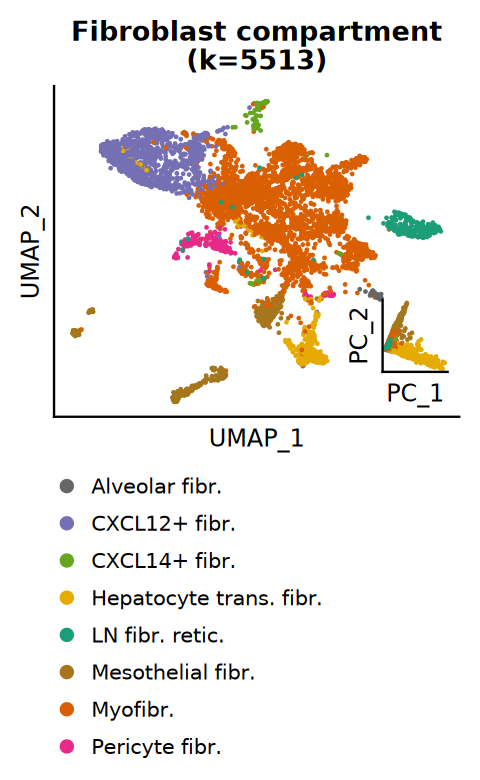

In [59]:
#! S7A
source('./helpers/color.R')

p1 <- DimPlot(fib_comp, group='Secondary', raster=F) + 
      scale_color_manual(values=colors_fib_comp) +
      ggtitle('') + no_ticks + theme(legend.position='bottom', legend.spacing = unit(0, 'pt')) +
      guides(color=guide_legend(nrow=8, byrow=F, override.aes = list(size=3)))
p2 <- DimPlot(fib_comp, group='Secondary', raster=F, reduction='pca') + 
      scale_color_manual(values=colors_fib_comp) + 
      NoLegend() + ggtitle('') + no_ticks
    

w <- 4
h <- 6.5
options(repr.plot.width=w, repr.plot.height=h)
out <- p1  + ggtitle(paste0('Fibroblast compartment\n(k=', nrow(fib_comp@meta.data), ')')) + inset_element(p2, 0.70, 0, 1, 0.5, align_to='panel')
out

ggsave(filename = '/home/ubuntu/data/cxcr4-pdac/figures/FigS7A.pdf', plot=out, height=h, width=w, device=Cairo::CairoPDF)

In [ ]:
Idents(t_comp) <- 'granular_annot'
Idents(b_comp) <- 'granular_annot'
Idents(myel_comp) <- 'granular_annot'
Idents(imm_comp) <- 'Primary'
Idents(fib_comp) <- 'granular_annot'

In [83]:
t.markers <- FindAllMarkers(t_comp) %>% mutate(compartment='T cell')
b.markers <- FindAllMarkers(b_comp) %>% mutate(compartment='B cell')
myel.markers <- FindAllMarkers(myel_comp) %>% mutate(compartment='Myeloid')
imm.markers <- FindAllMarkers(imm_comp) %>% mutate(compartment='Immune')
fib.markers <- FindAllMarkers(fib_comp) %>% mutate(compartment='Fibroblast')
all_markers <- list(t.markers=t.markers, b.markers=b.markers, myel.markers=myel.markers, imm.markers=imm.markers, fib.markers=fib.markers)
saveRDS(all_markers, '~/tmp/all_markers.RDS')

if (!dir.exists('/home/ubuntu/data/cxcr4-pdac/figures/markers')) dir.create('/home/ubuntu/data/cxcr4-pdac/figures/markers')
subset_markers <- bind_rows(all_markers)
write.table(subset_markers, '/home/ubuntu/data/cxcr4-pdac/figures/markers/subset_markers.tsv', sep='\t',
            row.names = F, col.names = T, quote = F)

In [ ]:

source('./helpers/color.R')
all_markers <- readRDS('~/tmp/all_markers.RDS')

get_top <- function(df, n) {
  df %>%
  mutate(ratio = pct.1 / pct.2) %>%
  group_by(cluster) %>%
  arrange(-avg_log2FC) %>%
  #filter(pct.1 > 0.1) %>% filter(pct.2 < 0.1) %>%
  #filter(ratio > 2) %>%
  filter(avg_log2FC > 1) %>%
  slice_min(p_val_adj, n=n)
} 


# all_markers[['t.markers']] %>% get_top(5)

t_list <- list('Treg'=c('FOXP3', 'IL2RA'), 
               'Effector CD4'=c('PLCB1', 'ADAM12', 'ITGA1', 'CD27', 'IL7R', 'FHIT'), # FHIT is negative marker
               'Memory CD4'=c('LEF1', 'TCF7'),
               'NK'=c('GNLY', 'NCAM1', 'KLRF1'),
               'MAIT'=c('SLC4A10', 'LTK'),
               'CD8 Tem'=c('DTHD1', 'AOAH'),
               'CD8 Tex'=c('SRGAP3', 'PDE7B', 'NHS'))
t_list <- t_list %>% unlist() %>% as.character()
t_comp$Secondary <- factor(t_comp$Secondary, 
                              levels=t_comp$Secondary %>% 
                                      unique() %>% rev())
Idents(t_comp) <- t_comp$Secondary


w <- 6.5
h <- 3.5
options(repr.plot.width=w, repr.plot.height=h)
p1 <- DotPlot(t_comp, t_list, assay='RNA',
       group.by='Secondary') +
        dotplot_theme +
        ggtitle('T cell compartment') + 
        scale_colour_gradientn(colours = dotplot_colors)
# p1

ggsave('/home/ubuntu/data/cxcr4-pdac/figures/markers/T.pdf', p1, width=w, height=h)

In [ ]:

source('./helpers/color.R')
b_list <- all_markers[['b.markers']] %>% get_top(3) %>% .$gene



b_list <- list('Memory'=c('BANK1', 'MS4A1', 'BLK'), 
               'Naive'=c('BACH2', 'IL4R', 'COL19A1'),
               'Plasma'=c('LINGO1', 'RASGEF1B', 'SLC26A3','IGKC'),
               'Cycling'=c('POLQ', 'RRM2', 'ASPM'))
b_list <- b_list %>% unlist() %>% as.character()
b_comp$Secondary <- factor(b_comp$Secondary, 
                              levels=b_comp$Secondary %>% 
                                      unique() %>% rev())
Idents(b_comp) <- b_comp$Secondary


w <- 6
h <- 3.5
options(repr.plot.width=w, repr.plot.height=h)
p2 <- DotPlot(b_comp, b_list, assay='RNA',
       group.by='Secondary') +
        dotplot_theme +
        ggtitle('B cell compartment') + 
        scale_colour_gradientn(colours = dotplot_colors)
# p2
ggsave('/home/ubuntu/data/cxcr4-pdac/figures/markers/B.pdf', p2, width=w, height=h)

Warning message:
“Scaling data with a low number of groups may produce misleading results”
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


In [ ]:

source('./helpers/color.R')

# all_markers[['myel.markers']] %>% 
#   mutate(ratio=pct.1/pct.2) %>%
#   group_by(cluster) %>%
#   slice_max(avg_log2FC, n=10) %>%
#   filter(cluster=='Myeloid::cDC')

# tmp <- FindMarkers(myel_comp, ident.1='Myeloid::cDC', ident.2='Myeloid::pDC')

myel_list <- list('Cycling myeloid'=c('MKI67', 'ASPM', 'RRM2', 'POLQ'),
                  'HSC'=c('MSI2', 'ERG', 'CALN1', 'NKAIN2'),
                  'Monocyte'=c('FCN1', 'S100A8', 'S100A9'),
                  'M1'=c('STAT1', 'GBP5'),
                  'M2'=c('MRC1','CD163', 'LILRB5'),
                  'Mast cell'=c('HDC', 'KIT', 'CPA3', 'SLC24A3'), 
                  'pDC'=c('EPHB1', 'PTPRS', 'CUX2'),
                  'cDC'=c('ITGAX', 'CADM1', 'ID2', 'CD1C'),
                  'Langerhans'=c('FCGBP', 'CD207', 'CD1A'))
myel_list2 <- myel_list %>% unlist() %>% as.character()
myel_comp$Secondary <- factor(myel_comp$Secondary, 
                              levels=names(myel_list) %>% 
                                      unique() %>% rev())
Idents(myel_comp) <- myel_comp$Secondary


w <- 8
h <- 3.5
options(repr.plot.width=w, repr.plot.height=h)
p3 <- DotPlot(myel_comp, myel_list2, assay='RNA',
       group.by='Secondary') +
        dotplot_theme +
        ggtitle('Myeloid compartment') + 
        scale_colour_gradientn(colours = dotplot_colors)
# p3
ggsave('/home/ubuntu/data/cxcr4-pdac/figures/markers/Myeloid.pdf', p3, width=w, height=h)

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


In [ ]:

source('./helpers/color.R')
# all_markers[['imm.markers']] %>% 
#   mutate(ratio=pct.1/pct.2) %>%
#   filter(pct.1 > 0.5) %>%
#   filter(pct.2 < 0.1) %>%
#   group_by(cluster) %>%
#   slice_max(ratio, n=5)


imm_list <- list('Myeloid'=c('ITGAM', 'MRC1', 'DAPK1', 'LRMDA'),
                  'T'=c('BCL11B','CD96', 'SKAP1'),
                  'B'=c('IGKC', 'IGHG1'))
imm_list <- imm_list %>% unlist() %>% as.character()
imm_comp$Primary <- factor(imm_comp$Primary, levels=c('B cell', 'T cell', 'Myeloid'))
Idents(imm_comp) <- imm_comp$Primary


w <- 3.7
h <- 2.2
options(repr.plot.width=w, repr.plot.height=h)
p4 <- DotPlot(imm_comp, imm_list, assay='RNA',
       group.by='Primary') +
        dotplot_theme + theme(legend.position='none') +
        ggtitle('Immune compartment') + 
        scale_colour_gradientn(colours = dotplot_colors)
# p4 
ggsave('/home/ubuntu/data/cxcr4-pdac/figures/markers/imm_comp.pdf', p4, width=w, height=h)

Warning message:
“Scaling data with a low number of groups may produce misleading results”
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


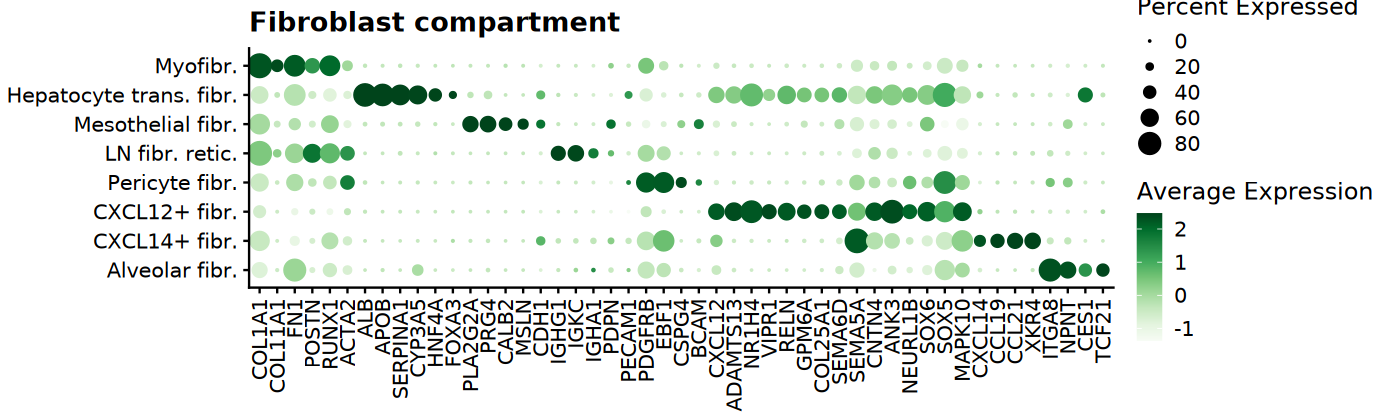

In [30]:
#! Fig S7B

source('./helpers/color.R')
# fib.markers %>% mutate(ratio = pct.1/pct.2) %>% group_by(cluster) %>% 
#   arrange(-avg_log2FC) %>% 
#   filter(cluster=='Fibroblast::CXCL14+ fibr.')  %>%
#   slice_max(ratio, n=500) %>%
#   filter(gene=='CCL19')


fib_list <- list('Myofibroblast' = c('COL1A1', 'COL11A1', 'FN1', 'POSTN', 'RUNX1', 'ACTA2'),
                 'Hepatocyte trans. fibr' = c('ALB', 'APOB','SERPINA1', 'CYP3A5', 'HNF4A', 'FOXA3'),
                 'Mesothelial' = c('PLA2G2A', 'PRG4', 'CALB2', 'MSLN', 'CDH1'),
                 'LN fibr retic' = c('IGHG1', 'IGKC','IGHA1','PDPN', 'PECAM1'), # Should be PECAM1-PDPN+
                 'Pericyte fibr' = c('PDGFRB', 'EBF1', 'CSPG4', 'BCAM'),
                 'CXCL12' = c('CXCL12', 'ADAMTS13', 'NR1H4', 'VIPR1', 'RELN', 'GPM6A', 'COL25A1', 'SEMA6D', 'SEMA5A', 'CNTN4', 'ANK3', 'NEURL1B', 'SOX6', 'SOX5', 'MAPK10'), # RELN onwards is neurogenic
                 'CXCL14' = c('CXCL14', 'CCL19','CCL21', 'XKR4'),
                 'Alveolar' = c('ITGA8', 'NPNT', 'CES1', 'TCF21'))
fib_list <- fib_list %>% unlist() %>% as.character()
fib_comp$Secondary <- factor(fib_comp$Secondary, 
                              levels=fib_comp$Secondary %>% 
                                      unique() %>% rev())
Idents(fib_comp) <- fib_comp$Secondary


w <- 11.5
h <- 3.5
options(repr.plot.width=w, repr.plot.height=h)
p5 <- DotPlot(fib_comp, fib_list, assay='RNA',
       group.by='Secondary') +
       # coord_flip() +
        dotplot_theme +
        ggtitle('Fibroblast compartment') +
        scale_colour_gradientn(colours = dotplot_colors)
# p5
p5
ggsave('/home/ubuntu/data/cxcr4-pdac/figures/FigS7B.pdf', p5, width=w, height=h)

## Misc analyses

### Ligand-Receptor validation

Dot plots validating the predicted L-R interactions from Karan's ContactTracing analysis

Warning message:
“Scaling data with a low number of groups may produce misleading results”
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Warning message:
“Scaling data with a low number of groups may produce misleading results”
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Warning message:
“Scaling data with a low number of groups may produce misleading results”
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


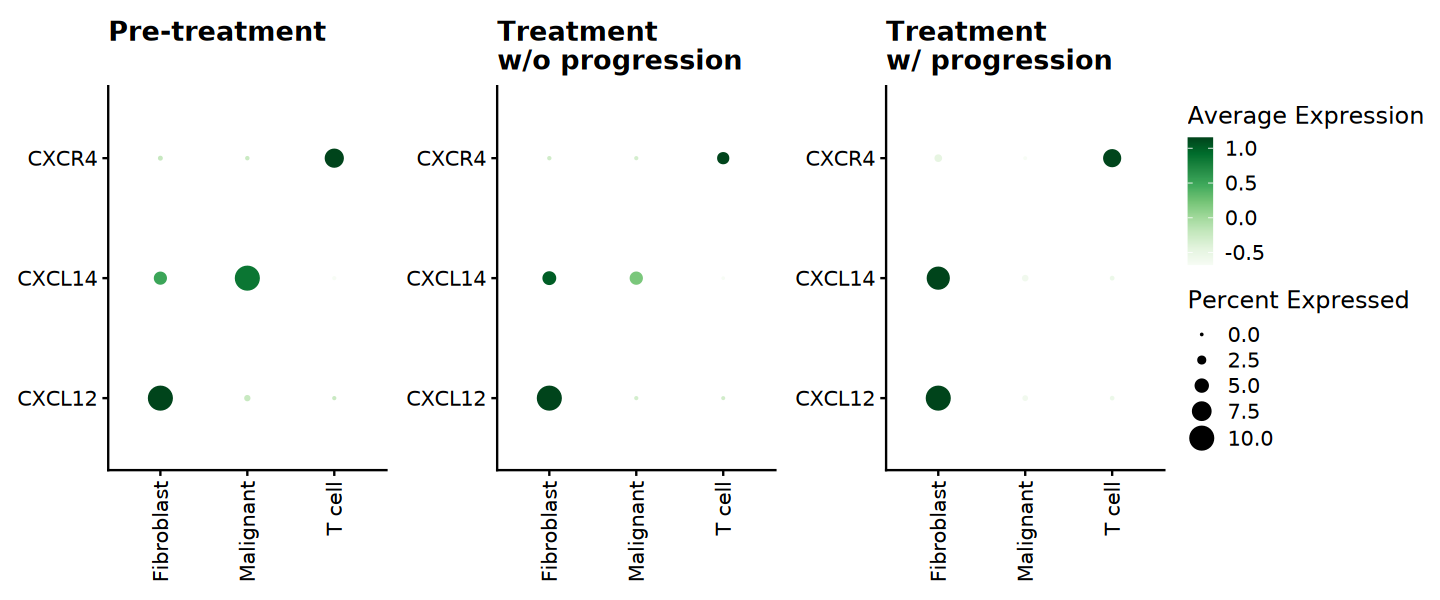

In [5]:
# Figure S5D

make_dotplot <- function(comp, genes, stage=NA, groupby=NA, method='dot', legend=F, scale.max=50) {
  if (method=='dot') {
    if ('effective.treatment.stage' %in% colnames(comp@meta.data)) {
      cur_subset <- subset(comp, subset=effective.treatment.stage==stage)
    } else {
      cur_subset <- subset(comp, subset=treatment.stage==stage)
    }

    out <- DotPlot(cur_subset, 
          genes, assay='RNA', group.by=groupby, scale.min=0, scale.max=scale.max
          ) +
          dotplot_theme +
          ggtitle(stage) + 
          scale_colour_gradientn(colours = dotplot_colors) + 
          coord_flip()
  } else {
    out <- VlnPlot(comp,
          method, assay='RNA', group.by=treatment.stage) +
          scale_fill_manual(values=colors_treatment_stage)
  }

  if (!legend) {
    out <- out + NoLegend()
  }
  return(out)
}

genes_1 <- c('CXCL12', 'CXCL14', 'CXCR4') %>% rev() 
genes_2 <- c( 'PTK2','PTK2B', 'KRT19', 'TGM2') %>% rev() 



geneset <- 1
if (geneset==1) {
  genes <- genes_1 %>% rev()
  scale.max <- 10
} else if (geneset==2) {
  genes <- genes_2
  scale.max <- 25
}



options(repr.plot.width=12, repr.plot.height=5)
make_dotplot(
    combined %>% subset(subset= Primary %in% c('T cell', 'Fibroblast', 'Malignant')),
    genes = genes,
    stage= 'Pre-treatment',
    groupby='Primary',
    scale.max=scale.max,
    legend=F
) | make_dotplot(
    combined %>% subset(subset= Primary %in% c('T cell', 'Fibroblast', 'Malignant')),
    genes = genes,
    stage= 'Treatment\nw/o progression',
    groupby='Primary',
    scale.max=scale.max,
    legend=F
) | make_dotplot(
    combined %>% subset(subset= Primary %in% c('T cell', 'Fibroblast', 'Malignant')),
    genes = genes,
    stage= 'Treatment\nw/ progression',
    groupby='Primary',
    scale.max=scale.max,
    legend=T
)

ggsave('/home/ubuntu/data/cxcr4-pdac/figures/FigS5D.pdf', height=5, width=12)


### Exhaustion markers in immune compartment

In [7]:
checkpoint_inhib <- c('PDCD1', 
                      'CD274', # PDL1
                      'PDCD1LG2', #PDL2
                      'CTLA4', 
                      'TIGIT', 
                      'LAG3', 
                      'HAVCR2', #TIM3
                      'BTLA',
                      'VSIR', # VISTA
                      'IDO1' # IDO
                      ) 
checkpoint_stim <- c('ICOS',
                      'ICOSLG',
                      'CD40',
                      'CD40LG',
                      'CD28',
                      'CD80',
                      'CD86',
                      'TNFRSF9', # 4-1BB aka CD137
                      'TNFSF9' # 4-1BBL
                      )

source('./helpers/color.R')
annotations <- make_granular_labels()
# immune <- immune %>% AddMetaData(annotations) %>% add_metadata()


make_dotplot <- function(comp, type, stage=NA, groupby=NA, method='dot', legend=F, scale.max=50) {
  if (type == 'stim') {
    genes <- rev(checkpoint_stim)
  } else if (type == 'inhib') {
    genes <- rev(checkpoint_inhib)
  }
  if (method=='dot') {
    if ('effective.treatment.stage' %in% colnames(comp@meta.data)) {
      cur_subset <- subset(comp, subset=effective.treatment.stage==stage)
    } else {
      cur_subset <- subset(comp, subset=treatment.stage==stage)
    }

    out <- DotPlot(cur_subset, 
          genes, assay='RNA', group.by=groupby, scale.min=0, scale.max=scale.max
          ) +
          dotplot_theme +
          ggtitle(stage) + 
          scale_colour_gradientn(colours = dotplot_colors) + 
          coord_flip()
  } else {
    out <- VlnPlot(comp,
          method, assay='RNA', group.by=treatment.stage) +
          scale_fill_manual(values=colors_treatment_stage)
  }

  if (!legend) {
    out <- out + NoLegend()
  }
  return(out)
}
  

In [8]:
comp_ucell <- imm_comp %>% 
              UCell::AddModuleScore_UCell(features = list('Checkpoint_stim'=checkpoint_stim,
                                                          'Checkpoint_inhib'=checkpoint_inhib))


# "Effective" treatment stage treats on-trt sample for PD as progression biopsy
comp_ucell@meta.data$effective.treatment.stage <- ifelse(comp_ucell$treatment.stage=='PRE', 'Pre-treatment',
                                                        ifelse(comp_ucell$treatment.stage=='ON_TRT', 'Treatment\nw/o progression',
                                                          ifelse(comp_ucell$treatment.stage=='ON_PROG', 'Treatment\nw/ progression', NA)))
comp_ucell@meta.data[(comp_ucell@meta.data$response=='PD') & (comp_ucell@meta.data$treatment.stage=='ON_TRT'), 'effective.treatment.stage'] <- 'Treatment\nw/ progression'


comp_ucell$effective.treatment.stage <- factor(comp_ucell$effective.treatment.stage, levels=c('Pre-treatment', 'Treatment\nw/o progression', 'Treatment\nw/ progression'))    
comp_ucell$broad_compartment <- 'Immune'

In [ ]:
#! Figure S8D
options(repr.plot.width=5, repr.plot.height=6)
# Idents(comp_ucell) <- 'Primary'


make_vln_boxplot <- function(obj, group_by, split_by, yaxis, title) {
  dodge <- 0.6
  median_vals <- obj@meta.data %>%
    group_by(!!sym(group_by), !!sym(split_by)) %>%
    summarize(y = mean(!!sym(yaxis))) %>%
    dplyr::rename('yaxis' = 'y')
  plot <- ggplot(obj@meta.data, aes(!!sym(group_by), !!sym(yaxis), fill=!!sym(split_by))) +
    geom_jitter(position = position_jitterdodge(seed = 1, dodge.width = dodge), alpha=0.03) +
    geom_violin(position = position_dodge(width = dodge)) +  
    # geom_boxplot(width=dodge)  +
    theme_classic() + 
    scale_fill_manual(values=colors_effective_treatment_stage) +
    ggtitle(title) +
    xlab(group_by) + ylab(yaxis) +
    theme(legend.position='bottom', legend.title=element_blank()) +
    guides(fill=guide_legend(nrow=1, byrow=T)) +
    geom_point(aes(!!sym(group_by), yaxis, fill=!!sym(split_by)), 
                  position = position_dodge(width = dodge), size=2, color='black',
              data=median_vals)
  # print(plot)
  return(plot)
}


# make_vln_boxplot(comp_ucell, 'broad_compartment', 'effective.treatment.stage', 'Checkpoint_stim_UCell', 'Checkpoint stimulatory signature in immune cells')
# make_vln_boxplot(comp_ucell, 'broad_compartment', 'effective.treatment.stage', 'Checkpoint_inhib_UCell', 'Checkpoint inhibitory signature in immune cells')


h <- 5
w <- 5

# make_vln_boxplot(comp_ucell, 'Primary', 'effective.treatment.stage', 'Checkpoint_stim_UCell', 'Checkpoint stimulatory signature in immune cells')
#  ggsave(filename='/home/ubuntu/data/cxcr4-pdac/figures/new_numbering/FigS4Q.pdf', height=h, width=w)
make_vln_boxplot(comp_ucell, 'Primary', 'effective.treatment.stage', 'Checkpoint_inhib_UCell', 'Checkpoint inhibitory signature in immune cells') # + scale_y_log10()
ggsave(filename='/home/ubuntu/data/cxcr4-pdac/figures/new_numbering/FigS8D.pdf', height=h, width=w)

In [14]:
p.vals <- c(
    kruskal.test(Checkpoint_stim_UCell~effective.treatment.stage, data=comp_ucell@meta.data %>% filter(Primary=='B cell'))$p.value,
    kruskal.test(Checkpoint_stim_UCell~effective.treatment.stage, data=comp_ucell@meta.data %>% filter(Primary=='Myeloid'))$p.value,
    kruskal.test(Checkpoint_stim_UCell~effective.treatment.stage, data=comp_ucell@meta.data %>% filter(Primary=='T cell'))$p.value,

    kruskal.test(Checkpoint_inhib_UCell~effective.treatment.stage, data=comp_ucell@meta.data %>% filter(Primary=='B cell'))$p.value,
    kruskal.test(Checkpoint_inhib_UCell~effective.treatment.stage, data=comp_ucell@meta.data %>% filter(Primary=='Myeloid'))$p.value,
    kruskal.test(Checkpoint_inhib_UCell~effective.treatment.stage, data=comp_ucell@meta.data %>% filter(Primary=='T cell'))$p.value
)

p.adjust(p.vals, method='bonferroni')

[1] 4.079136e-01 4.446607e-62 7.362744e-20 6.364990e-01 3.612277e-32
[6] 4.764592e-18

In [ ]:
#! FIGURE 4G 
misc_outdir <- '/home/ubuntu/data/cxcr4-pdac/figures/misc_analyses'
checkpoint_outdir <- file.path(misc_outdir, 'checkpoint_markers')
if (!dir.exists(checkpoint_outdir)) dir.create(checkpoint_outdir, recursive=T) 


SCALE_MAX <- 20
h <- 4.5
w <- 12
options(repr.plot.width=w, repr.plot.height=h)
p1a <- make_dotplot(comp_ucell, 'stim', 'Pre-treatment', 'Primary', scale.max=SCALE_MAX)
p2a <- make_dotplot(comp_ucell, 'stim', 'Treatment\nw/o progression', 'Primary', scale.max=SCALE_MAX)
p3a <- make_dotplot(comp_ucell, 'stim', 'Treatment\nw/ progression', 'Primary', legend=T, scale.max=SCALE_MAX)
p4a <- ((p1a | p2a | p3a) + plot_annotation(title='Immune Stimulatory Checkpoint Markers'))
# ggsave(file.path(checkpoint_outdir, 'checkpoint_markers_primary.pdf'), p4a, width=w, height=h)
p4a


p1a <- make_dotplot(comp_ucell, 'inhib', 'Pre-treatment', 'Primary', scale.max=SCALE_MAX)
p2a <- make_dotplot(comp_ucell, 'inhib', 'Treatment\nw/o progression', 'Primary', scale.max=SCALE_MAX)
p3a <- make_dotplot(comp_ucell, 'inhib', 'Treatment\nw/ progression', 'Primary', legend=T, scale.max=SCALE_MAX)
p4a <- ((p1a | p2a | p3a) + plot_annotation(title='Immune Inhibitory Checkpoint Markers'))
p4a
ggsave(file.path('/home/ubuntu/data/cxcr4-pdac/figures/new_numbering/Fig4G.pdf'), p4a, width=w, height=h)



SCALE_MAX <- 50
h <- 5
w <- 15
options(repr.plot.width=w, repr.plot.height=h)
p1b <- make_dotplot(comp_ucell, 'stim', 'Pre-treatment', 'granular_annot', scale.max=SCALE_MAX)
p2b <- make_dotplot(comp_ucell, 'stim', 'Treatment\nw/o progression', 'granular_annot', scale.max=SCALE_MAX)
p3b <- make_dotplot(comp_ucell, 'stim', 'Treatment\nw/ progression', 'granular_annot', legend=T, scale.max=SCALE_MAX)
p4b <- ((p1b | p2b | p3b) + plot_annotation(title='Immune Stimulatory Checkpoint Markers'))
p4b



p1b <- make_dotplot(comp_ucell, 'inhib', 'Pre-treatment', 'granular_annot', scale.max=SCALE_MAX)
p2b <- make_dotplot(comp_ucell, 'inhib', 'Treatment\nw/o progression', 'granular_annot', scale.max=SCALE_MAX)
p3b <- make_dotplot(comp_ucell, 'inhib', 'Treatment\nw/ progression', 'granular_annot', legend=T, scale.max=SCALE_MAX)
p4b <- ((p1b | p2b | p3b) + plot_annotation(title='Immune Inhibitory Checkpoint Markers'))
# ggsave(file.path(checkpoint_outdir, 'checkpoint_markers_granular.pdf'), p4b, width=w, height=h)
ggsave(file.path('/home/ubuntu/data/cxcr4-pdac/figures/Fig4G.pdf'), p4b, width=w, height=h)
p4b

## Misc compartment breakdowns

Not really executing these; just keeping the code around if needed

In [ ]:
plot_subset(combined, 'Integration', group='pt.id')
plot_subset(combined, 'Integration', group='orig.ident')  
plot_subset(combined, 'Integration', group='race') 
plot_subset(combined, 'Integration', group='sex') 
plot_subset(combined, 'Integration', group='age')
plot_subset(combined, 'Integration', group='response') 

In [ ]:
plot_subset(malig, 'Malignant compartment', group='pt.id')
plot_subset(malig, 'Malignant compartment', group='orig.ident')  
plot_subset(malig, 'Malignant compartment', group='race') 
plot_subset(malig, 'Malignant compartment', group='sex') 
plot_subset(malig, 'Malignant compartment', group='age')
plot_subset(malig, 'Malignant compartment', group='response') 

In [ ]:
plot_subset(non_malig, 'Nonmalignant compartment', group='pt.id')
plot_subset(non_malig, 'Nonmalignant compartment', group='orig.ident')  
plot_subset(non_malig, 'Nonmalignant compartment', group='race') 
plot_subset(non_malig, 'Nonmalignant compartment', group='sex')
plot_subset(non_malig, 'Nonmalignant compartment', group='age') 
plot_subset(non_malig, 'Nonmalignant compartment', group='response') 

In [ ]:
plot_subset(immune, 'Immune compartment', group='pt.id')
plot_subset(immune, 'Immune compartment', group='orig.ident')  
plot_subset(immune, 'Immune compartment', group='race') 
plot_subset(immune, 'Immune compartment', group='sex') 
plot_subset(immune, 'Immune compartment', group='age')
plot_subset(immune, 'Immune compartment', group='response') 

In [ ]:
plot_subset(t_comp, 'T cell compartment', group='pt.id')
plot_subset(t_comp, 'T cell compartment', group='orig.ident')  
plot_subset(t_comp, 'T cell compartment', group='race') 
plot_subset(t_comp, 'T cell compartment', group='sex') 
plot_subset(t_comp, 'T cell compartment', group='age')
plot_subset(t_comp, 'T cell compartment', group='response') 

In [ ]:
plot_subset(b_comp, 'B cell compartment', group='pt.id')
plot_subset(b_comp, 'B cell compartment', group='orig.ident')  
plot_subset(b_comp, 'B cell compartment', group='race') 
plot_subset(b_comp, 'B cell compartment', group='sex') 
plot_subset(b_comp, 'B cell compartment', group='age')
plot_subset(b_comp, 'B cell compartment', group='response') 

In [ ]:
plot_subset(myel_comp, 'Myeloid compartment', group='pt.id')
plot_subset(myel_comp, 'Myeloid compartment', group='orig.ident')  
plot_subset(myel_comp, 'Myeloid compartment', group='race') 
plot_subset(myel_comp, 'Myeloid compartment', group='sex') 
plot_subset(myel_comp, 'Myeloid compartment', group='age')
plot_subset(myel_comp, 'Myeloid compartment', group='response') 

In [ ]:
plot_subset(fib_comp, 'Fibroblast compartment', group='pt.id', r=F)
plot_subset(fib_comp, 'Fibroblast compartment', group='orig.ident', r=F)  
plot_subset(fib_comp, 'Fibroblast compartment', group='race', r=F) 
plot_subset(fib_comp, 'Fibroblast compartment', group='sex', r=F) 
plot_subset(fib_comp, 'Fibroblast compartment', group='age', r=F)
plot_subset(fib_comp, 'Fibroblast compartment', group='response', r=F) 
plot_subset(fib_comp, 'Fibroblast compartment', group='treatment.stage', r=F) 